# Alignment of Business Communications with Tone of Voice (NLP + LLMs)

We build a multi-label tone classifier for business text with three labels: **Straightforward**, **Intentional**, **Warm**. We compare classic ML and transformer baselines, and provide LIME explanations that highlight influential words and per-label confidence bars.





##  **Setup & Environment**

In [168]:
!pip -q install numpy pandas scikit-learn matplotlib lime transformers torch==2.3.1 openai

import os, random, numpy as np, torch
SEED = 42
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

print("Environment ready. Torch:", torch.__version__, "| CUDA:", torch.cuda.is_available())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 817.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 629.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 684.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does 

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import Dataset
import os
import torch

In [171]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [172]:
!pip install gdown -q

import gdown

folder_id = "1m9cIGkhIgcbUakI6ijc3W4r5-4t5xX3U"

gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}",
                      quiet=False, use_cookies=False)


Retrieving folder contents


Retrieving folder 1XOvY9EWiC8u69nso5RZ2xvOuJLZOi7aX DataProvided
Processing file 1fA1fjzT5taNqaiW6POkHtz1bhJbUZTZV final_ToV_annotation.csv
Processing file 12bRzlp1UMTDYAcXXv71S7TwvOyokyany Manually_curated_ToV_gold_standard.csv
Processing file 1evkX_6MURoncr85WH1he7eTue7OmHTs1 ToV_annotation_Andrew.csv
Processing file 1GOJ1znBdHvAxRYH4vv8387FrLV_tY6ve ToV_annotation_Conor.csv
Processing file 1ayYXdXDAxebwtTKnvy5tSC_X2qMRnriC ToV_annotation_Holly.csv
Processing file 1gseJk0c-BI0_AWcEKhemoepKynh7eJQZ ToV_annotation_LLM.csv
Processing file 15OV7-rSCyerCZHeHHQ3nL34KoDkJnPJ9 ToV_annotation_Richard.csv
Retrieving folder 1ClpR2_-EQ5iWZmEGyUhGnBLJwUTh0cvp SyntheticData
Processing file 1wje_sK6z1e9fbCsfxZvi297PLMuRy3bQ silver_tov_silverdataset.xlsx
Processing file 18Reiyu4_0FRrXgMPjnE2OR3XS6z77kPA synthetic_tov_additional_balancing.csv
Processing file 1Rnqxq3berOCYoSMp8EkRf_jgn8C2y7lY synthetic_tov_dataset.csv
Processing file 16M7-xuVARB_o0wciNJc-8fTer80LhIGT synthetic_tov_silver.csv
Processin

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1fA1fjzT5taNqaiW6POkHtz1bhJbUZTZV
To: /content/Tov_Dissertation_Data/DataProvided/final_ToV_annotation.csv
100%|██████████| 8.44k/8.44k [00:00<00:00, 22.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=12bRzlp1UMTDYAcXXv71S7TwvOyokyany
To: /content/Tov_Dissertation_Data/DataProvided/Manually_curated_ToV_gold_standard.csv
100%|██████████| 9.62k/9.62k [00:00<00:00, 24.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1evkX_6MURoncr85WH1he7eTue7OmHTs1
To: /content/Tov_Dissertation_Data/DataProvided/ToV_annotation_Andrew.csv
100%|██████████| 9.10k/9.10k [00:00<00:00, 27.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GOJ1znBdHvAxRYH4vv8387FrLV_tY6ve
To: /content/Tov_Dissertation_Data/DataProvided/ToV_annotation_Conor.csv
100%|██████████| 8.96k/8.96k [00:00<00:00, 24.9MB/s]
Downloading...
From: https://dri

['/content/Tov_Dissertation_Data/DataProvided/final_ToV_annotation.csv',
 '/content/Tov_Dissertation_Data/DataProvided/Manually_curated_ToV_gold_standard.csv',
 '/content/Tov_Dissertation_Data/DataProvided/ToV_annotation_Andrew.csv',
 '/content/Tov_Dissertation_Data/DataProvided/ToV_annotation_Conor.csv',
 '/content/Tov_Dissertation_Data/DataProvided/ToV_annotation_Holly.csv',
 '/content/Tov_Dissertation_Data/DataProvided/ToV_annotation_LLM.csv',
 '/content/Tov_Dissertation_Data/DataProvided/ToV_annotation_Richard.csv',
 '/content/Tov_Dissertation_Data/SyntheticData/silver_tov_silverdataset.xlsx',
 '/content/Tov_Dissertation_Data/SyntheticData/synthetic_tov_additional_balancing.csv',
 '/content/Tov_Dissertation_Data/SyntheticData/synthetic_tov_dataset.csv',
 '/content/Tov_Dissertation_Data/SyntheticData/synthetic_tov_silver.csv',
 '/content/Tov_Dissertation_Data/final_ToV_annotation.csv']

##  **Data Loading & Preprocessing**

In [173]:
base_path = '/content/Tov_Dissertation_Data/DataProvided/'

annotator1 = pd.read_csv(base_path + 'ToV_annotation_Andrew.csv', encoding='utf-8-sig')
annotator2 = pd.read_csv(base_path + 'ToV_annotation_Conor.csv', encoding='utf-8-sig')
annotator3 = pd.read_csv(base_path + 'ToV_annotation_Holly.csv', encoding='utf-8-sig')
annotator4 = pd.read_csv(base_path + 'ToV_annotation_Richard.csv', encoding='latin1')
llm = pd.read_csv(base_path + 'ToV_annotation_LLM.csv', encoding='latin1')

print(llm.head())

                                                                                                                        Sentence  \
0                                                                                Select the 'Email me a link to sign in' option.   
1                                                                                                                       Find it.   
2                                                                          You will still buy the car from the dealer or seller.   
3                                            You can simply skip the step or discard the valuation and continue with your order.   
4  A lease credit application involves answering some important questions about your earnings and how much you spend each month.   

   straightforward  intentional  warm  
0                1            0     0  
1                1            1     0  
2                1            0     0  
3                1            1     0  
4      

In [174]:
print("Ann 1", len(annotator1))
print("Ann 2", len(annotator2))
print("Ann 3", len(annotator3))
print("Ann 4", len(annotator4))
print("LLM", len(llm))

Ann 1 122
Ann 2 122
Ann 3 122
Ann 4 122
LLM 122


### **Dealing with Missing Values**

In [175]:
print(annotator1.isna().sum())

Sentence                0
straightforward        52
intentional            93
warm                   77
Additional remarks    117
dtype: int64


In [176]:
annotator1 = annotator1.fillna(0)
annotator2 = annotator2.fillna(0)
annotator3 = annotator3.fillna(0)
annotator4 = annotator4.fillna(0)
llm = llm.fillna(0)

###   I will combine the 5 csv files provided and use the majority voted tone for each sentence

In [177]:
#Rename tone columns so it's easily identifiable in the combined dataset
def rename_tone_columns(df, prefix):
    tone_cols = ['straightforward', 'intentional', 'warm']
    df = df.rename(columns={col: f"{prefix}_{col}" for col in tone_cols})
    return df[['Sentence'] + [f"{prefix}_{col}" for col in tone_cols]]

annotator1 = rename_tone_columns(annotator1, 'ann1')
annotator2 = rename_tone_columns(annotator2, 'ann2')
annotator3 = rename_tone_columns(annotator3, 'ann3')
annotator4 = rename_tone_columns(annotator4, 'ann4')
llm = rename_tone_columns(llm, 'llm')


In [178]:
annotator1.head()

Sentence  \
0                                                                                Select the 'Email me a link to sign in' option.   
1                                                                                                                       Find it.   
2                                                                          You will still buy the car from the dealer or seller.   
3                                            You can simply skip the step or discard the valuation and continue with your order.   
4  A lease credit application involves answering some important questions about your earnings and how much you spend each month.   

   ann1_straightforward  ann1_intentional  ann1_warm  
0                   1.0               0.0        0.0  
1                   1.0               0.0        0.0  
2                   1.0               1.0        0.0  
3                   1.0               0.0        0.0  
4                   0.0               1.0        0.0

In [179]:
dataframes = [annotator1, annotator2, annotator3, annotator4, llm]

for i, df in enumerate(dataframes, start=1):
    duplicate_rows = df[df['Sentence'].duplicated(keep=False)]  # keep=False marks all duplicates, not just later ones
    print(f"\nAnnotator {i} duplicate sentences (count={len(duplicate_rows)}):")
    print(duplicate_rows['Sentence'].unique())  # print unique duplicated sentences only



Annotator 1 duplicate sentences (count=14):
["Select the 'Email me a link to sign in' option."
 'Only franchised trade sellers can sell unregistered cars on Auto Trader.'
 'For private and Pay as you Go trade sellers all adverts must be of UK-registered vehicles.'
 'Be quick, the link expires within 10 minutes!'
 "With just £99 fully you can make the car you've found yours."
 'But you can save time by doing more online.'
 'You can call us or chat online.']

Annotator 2 duplicate sentences (count=14):
["Select the 'Email me a link to sign in' option."
 'Only franchised trade sellers can sell unregistered cars on Auto Trader.'
 'For private and Pay as you Go trade sellers all adverts must be of UK-registered vehicles.'
 'Be quick, the link expires within 10 minutes!'
 "With just £99 fully you can make the car you've found yours."
 'But you can save time by doing more online.'
 'You can call us or chat online.']

Annotator 3 duplicate sentences (count=14):
["Select the 'Email me a link t

###   Drop duplicate Sentences in all datasets

In [180]:
dataframes = [annotator1, annotator2, annotator3, annotator4, llm]

for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].drop_duplicates(subset='Sentence', keep='first')


In [181]:
annotator1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sentence              122 non-null    object 
 1   ann1_straightforward  122 non-null    float64
 2   ann1_intentional      122 non-null    float64
 3   ann1_warm             122 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.9+ KB


In [182]:
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].set_index('Sentence')

df_merged = pd.concat(dataframes, axis=1).reset_index()

df_merged.head()

Sentence  \
0                                                                                Select the 'Email me a link to sign in' option.   
1                                                                                                                       Find it.   
2                                                                          You will still buy the car from the dealer or seller.   
3                                            You can simply skip the step or discard the valuation and continue with your order.   
4  A lease credit application involves answering some important questions about your earnings and how much you spend each month.   

   ann1_straightforward  ann1_intentional  ann1_warm  ann2_straightforward  \
0                   1.0               0.0        0.0                   1.0   
1                   1.0               0.0        0.0                   1.0   
2                   1.0               1.0        0.0                   1.0   
3                   1.0               0.0        0.0                   1.0   
4                   0.0               1.0        0.0                   1.0   

   ann2_intentional  ann2_warm  ann3_straightforward  ann3_intentional  \
0               0.0        0.0                   0.0               1.0   
1               1.0        0.0                   0.0               1.0   
2               0.0        0.0                   1.0               0.0   
3               1.0        0.0                   1.0               0.0   
4               1.0        0.0                   1.0               0.0   

   ann3_warm  ann4_straightforward  ann4_intentional  ann4_warm  \
0        0.0                   1.0               1.0        0.0   
1        0.0                   1.0               1.0        0.0   
2        0.0                   1.0               1.0        0.0   
3        0.0                   1.0               1.0        1.0   
4        0.0                   1.0               0.0        0.0   

   llm_straightforward  llm_intentional  llm_warm  
0                    1                0         0  
1                    1                1         0  
2                    1                0         0  
3                    1                1         0  
4                    1                0         0

In [183]:
# df_merged = df_merged.fillna(0)
df_merged.isna().sum()

Sentence                0
ann1_straightforward    0
ann1_intentional        0
ann1_warm               0
ann2_straightforward    0
ann2_intentional        0
ann2_warm               0
ann3_straightforward    0
ann3_intentional        0
ann3_warm               0
ann4_straightforward    0
ann4_intentional        0
ann4_warm               0
llm_straightforward     0
llm_intentional         0
llm_warm                0
dtype: int64

### Perform Majority Voting on the Combined Datasets. That is for each sentence tone pick the most frequent of the five.

In [184]:
tones = ['straightforward', 'intentional', 'warm']

def majority_vote(row, tone):
    votes = [
        row[f'ann1_{tone}'],
        row[f'ann2_{tone}'],
        row[f'ann3_{tone}'],
        row[f'ann4_{tone}'],
        row[f'llm_{tone}']
    ]
    return 1 if sum(votes) >= 3 else 0

for tone in tones:
    df_merged[f'{tone}'] = df_merged.apply(majority_vote, axis=1, tone= tone)

final_dataset = df_merged[['Sentence'] + [f'{tone}' for tone in tones]]


In [185]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentence         115 non-null    object
 1   straightforward  115 non-null    int64 
 2   intentional      115 non-null    int64 
 3   warm             115 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.7+ KB


In [186]:
final_dataset.head()

Sentence  \
0                                                                                Select the 'Email me a link to sign in' option.   
1                                                                                                                       Find it.   
2                                                                          You will still buy the car from the dealer or seller.   
3                                            You can simply skip the step or discard the valuation and continue with your order.   
4  A lease credit application involves answering some important questions about your earnings and how much you spend each month.   

   straightforward  intentional  warm  
0                1            0     0  
1                1            1     0  
2                1            0     0  
3                1            1     0  
4                1            0     0

##  **Data Exploration**

In [187]:
final_dataset[['straightforward','intentional','warm']].sum()

straightforward    102
intentional         53
warm                28
dtype: int64

In [188]:
# Average sentence length in words
final_dataset['word_count'] = final_dataset['Sentence'].apply(lambda x: len(str(x).split()))
average_length = final_dataset['word_count'].mean()

print(f"Average sentence length: {average_length:.2f} words")

Average sentence length: 12.24 words


/tmp/ipython-input-4156046776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['word_count'] = final_dataset['Sentence'].apply(lambda x: len(str(x).split()))


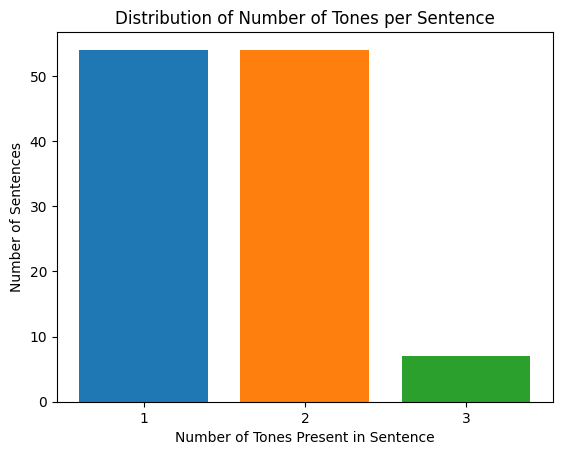

tone_count
1    54
2    54
3     7
Name: count, dtype: int64

In [189]:
tone_num = final_dataset.copy()
tone_num['tone_count'] = tone_num[['straightforward', 'intentional', 'warm']].sum(axis=1)

tone_distribution = tone_num['tone_count'].value_counts().sort_index()

plt.bar(tone_distribution.index, tone_distribution.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel("Number of Tones Present in Sentence")
plt.ylabel("Number of Sentences")
plt.title("Distribution of Number of Tones per Sentence")
plt.xticks(tone_distribution.index)
plt.show()

tone_distribution

#Most sentences in the dataset contain either one or two tones, while very few include all three.

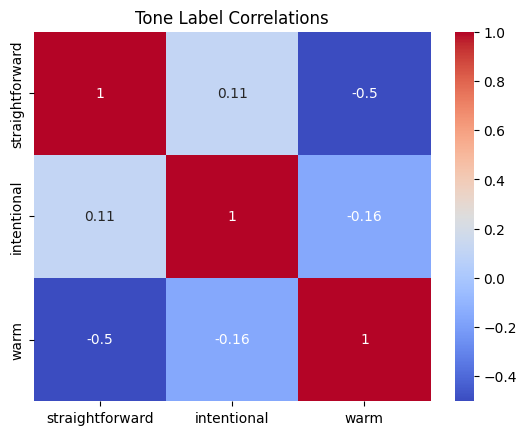

In [190]:
#Coefficient Matrix

corr = final_dataset[['straightforward', 'intentional', 'warm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Tone Label Correlations')
plt.show()

#We see that
#                straightforward and intentional tones can appear in the same sentence but they are not the same thing
#                Straightforward sentences usually don’t sound warm
#                Intentional and warm tones are also less likely to be used together
#This shows that all three tones are different and mostly used separately

/tmp/ipython-input-2563746990.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.loc[:, 'tone_combo'] = final_dataset.apply(get_tone_combo, axis=1)


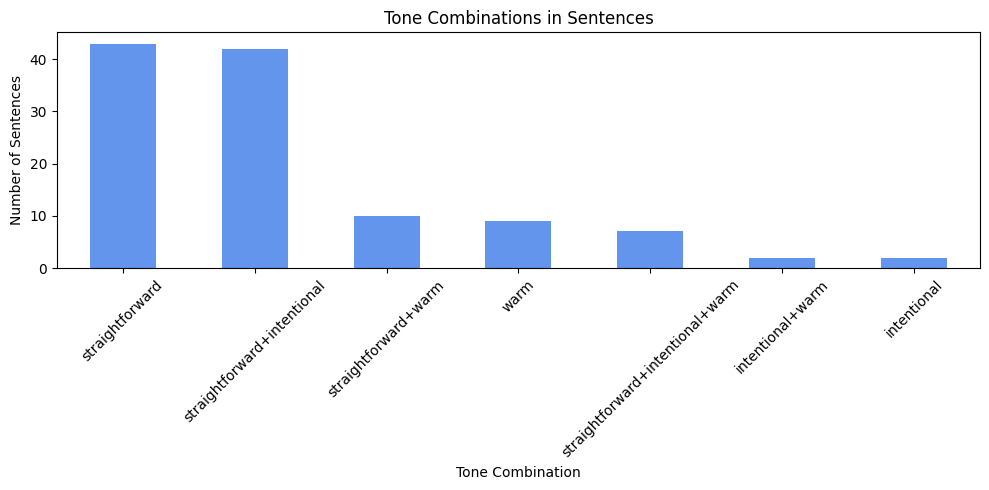

tone_combo
straightforward                     43
straightforward+intentional         42
straightforward+warm                10
warm                                 9
straightforward+intentional+warm     7
intentional+warm                     2
intentional                          2
Name: count, dtype: int64

In [191]:
#Tone Pairs

def get_tone_combo(row):
    tones = []
    if row['straightforward'] == 1:
        tones.append('straightforward')
    if row['intentional'] == 1:
        tones.append('intentional')
    if row['warm'] == 1:
        tones.append('warm')
    return '+'.join(tones)

final_dataset.loc[:, 'tone_combo'] = final_dataset.apply(get_tone_combo, axis=1)

combo_counts = final_dataset['tone_combo'].value_counts()

plt.figure(figsize=(10, 5))
combo_counts.plot(kind='bar', color='cornflowerblue')
plt.title("Tone Combinations in Sentences")
plt.xlabel("Tone Combination")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

combo_counts


In [192]:
# Find frequent words in sentences labeled with each tone.
#This just counts without really identifying tones

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

for tone in ['straightforward', 'intentional', 'warm']:
    tone_sentences = final_dataset[final_dataset[tone] == 1]['Sentence']
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    X = vectorizer.fit_transform(tone_sentences)
    word_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    print(f"Top words for {tone}:", Counter(word_counts).most_common(10))


Top words for straightforward: [('car', 19), ('account', 12), ('ll', 12), ('auto', 11), ('trader', 11), ('advert', 10), ('credit', 10), ('help', 9), ('online', 7), ('drive', 6)]
Top words for intentional: [('car', 10), ('account', 8), ('ll', 8), ('advert', 7), ('drive', 6), ('help', 6), ('like', 5), ('online', 5), ('step', 5), ('auto', 4)]
Top words for warm: [('help', 7), ('auto', 5), ('trader', 5), ('leasing', 4), ('support', 4), ('don', 3), ('team', 3), ('time', 3), ('ve', 3), ('deal', 2)]


In [193]:
import re

#Cleaning the sentences because the TfidfVectorizer splits on spaces and most punctuation
CONTRACTIONS = {
    "don't": "do not", "doesn't": "does not", "didn't": "did not",
    "can't": "cannot", "couldn't": "could not", "shouldn't": "should not",
    "won't": "will not", "wouldn't": "would not", "isn't": "is not",
    "aren't": "are not", "wasn't": "was not", "weren't": "were not",
    "i'm": "i am", "i’ve": "i have", "i'd": "i would", "i'll": "i will",
    "you've": "you have", "you'd": "you would", "you'll": "you will",
    "we're": "we are", "we've": "we have", "we'd": "we would", "we'll": "we will",
    "they're": "they are", "they've": "they have", "they'd": "they would", "they'll": "they will",
    "it's": "it is", "that's": "that is", "there's": "there is", "what's": "what is",
    "who's": "who is", "let's": "let us", "could've": "could have",
    "would've": "would have", "should've": "should have", "might've": "might have",
    "you’re": "you are", "haven’t": "have not", "hasn’t": "has not", "hadn’t": "had not",
    "we’re": "we are", "we’ll": "we will", "we’ve": "we have",
    "don’t": "do not", "can’t": "cannot", "you’ve": "you have"
}

def expand_contractions(text):
    text = text.lower()
    for contraction, expanded in CONTRACTIONS.items():
        text = re.sub(r"\b" + re.escape(contraction) + r"\b", expanded, text)
    return text

def clean_text(text):
    text = expand_contractions(text)
    text = re.sub(r"[’']", "'", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text.strip()

final_dataset = final_dataset.copy()
final_dataset.loc[:, 'Cleaned'] = final_dataset['Sentence'].apply(clean_text)

> My previous code fit a separate TF-IDF vectorizer on each tone subset, so the top words weren't really comparable across tones. The recommended approach is to fit TF-IDF on the entire dataset, then analyze the average score for each word within each tone. This gives a much clearer and fairer picture of what language is distinctive for each tone.

In [194]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentence         115 non-null    object
 1   straightforward  115 non-null    int64 
 2   intentional      115 non-null    int64 
 3   warm             115 non-null    int64 
 4   word_count       115 non-null    int64 
 5   tone_combo       115 non-null    object
 6   Cleaned          115 non-null    object
dtypes: int64(4), object(3)
memory usage: 6.4+ KB


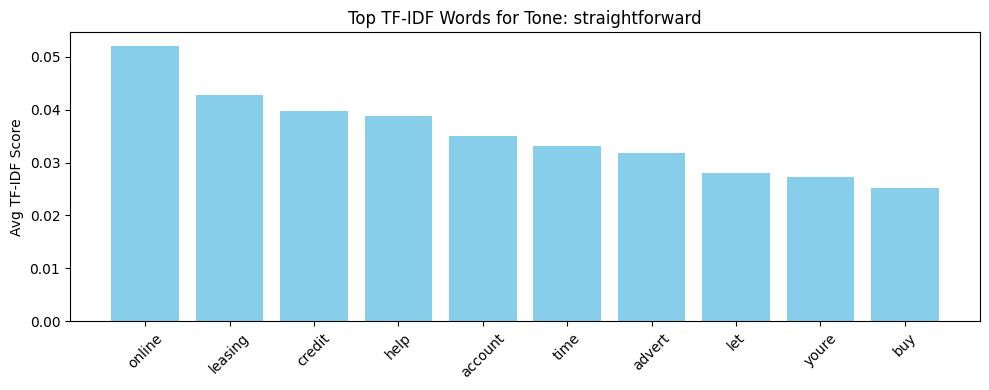

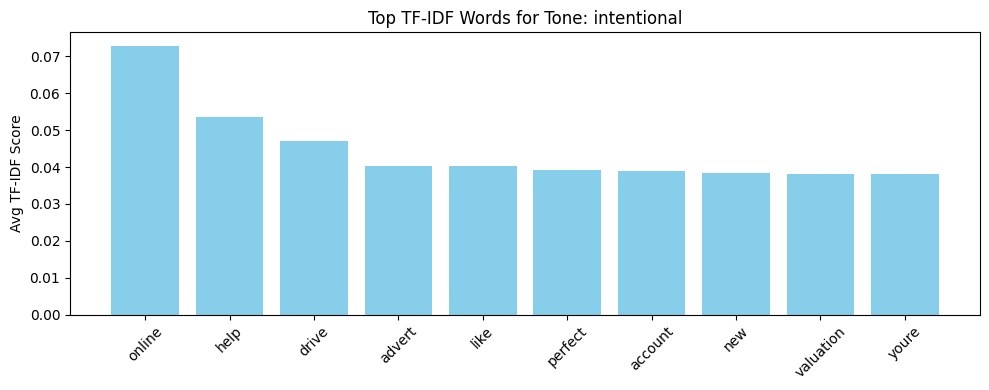

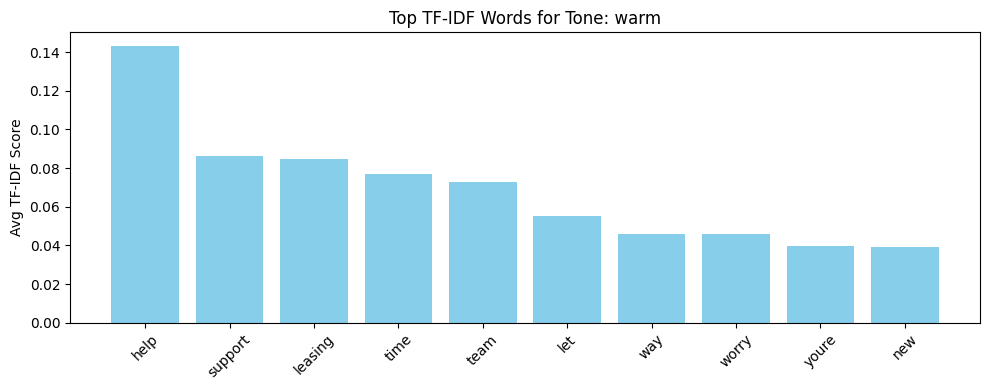

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

extra_stop = ['auto', 'trader', 'autotrader', 'car']
all_stop = list(ENGLISH_STOP_WORDS.union(extra_stop))

# 1- Fit TF-IDF on all sentences
vectorizer = TfidfVectorizer(stop_words=all_stop, max_features=100)
X = vectorizer.fit_transform(final_dataset['Cleaned'])
vocab = vectorizer.get_feature_names_out()

# 2- For each tone, find the most important words
for tone in ['straightforward', 'intentional', 'warm']:
    # Use final_dataset, not df
    mask = final_dataset[tone] == 1
    X_tone = X[mask.values]

    # Compute the average TF-IDF score for each word within this tone's sentences
    avg_tfidf = X_tone.mean(axis=0).A1

    # Pair each word with its average score
    word_scores = list(zip(vocab, avg_tfidf))

    # Sort words by importance and pick the top 10
    top_words = sorted(word_scores, key=lambda x: x[1], reverse=True)[:10]

    # Unpack for plotting
    words, scores = zip(*top_words)

    # Plot the results
    plt.figure(figsize=(10, 4))
    plt.bar(words, scores, color='skyblue')
    plt.title(f"Top TF-IDF Words for Tone: {tone}")
    plt.ylabel("Avg TF-IDF Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [196]:
print(final_dataset.columns)

Index(['Sentence', 'straightforward', 'intentional', 'warm', 'word_count',
       'tone_combo', 'Cleaned'],
      dtype='object')


## **Synthetic Data Generation**

In [197]:
#For fine tuning the format below is best so i'll create a dataset that replicates that.
    # Tone labels: straightforward=1, intentional=0, warm=0
    # Sentence: Select the 'Email me a link to sign in' option.

def finetuning_format(row):
    Sentence = row['Sentence']
    Labels = (
        f"Tone labels: straightforward={int(row['straightforward'])}, "
        f"intentional={int(row['intentional'])}, "
        f"warm={int(row['warm'])}"
    )

    return f"{Labels}\nSentence: {Sentence}"

formatted_data = "\n\n".join([finetuning_format(row) for _, row in final_dataset.iterrows()])

In [198]:
print(formatted_data[:304])

Tone labels: straightforward=1, intentional=0, warm=0
Sentence: Select the 'Email me a link to sign in' option.

Tone labels: straightforward=1, intentional=1, warm=0
Sentence: Find it.

Tone labels: straightforward=1, intentional=0, warm=0
Sentence: You will still buy the car from the dealer or seller.


In [199]:
from google.colab import userdata

secret_value_0 = userdata.get('OPENAI_API_KEY')

In [200]:
import time
from openai import OpenAI

regenerate_data = False #This is to ensure i don't affect the existing dataset while keeping the code

csv_path = "/content/Tov_Dissertation_Data/SyntheticData/synthetic_tov_dataset.csv"

if regenerate_data:

    client = openai.OpenAI(api_key= secret_value_0)

    #Function to call openai's gpt-4o model
    #I tried making a single call but it's unable to generate 1500 at once so i'll do 150 in
    #10 batches
    def generate_batch(n=150):
        #Prompt
        prompt_text = f"""
        You are a helpful assistant trained in business communication tone control.

        You are generating tone-controlled sentences for a company in the automotive retail domain, like AutoTrader, a UK-based platform for buying and leasing cars.

        Below are real examples of business messages from this company. Each one has a tone label for three binary tone dimensions:
        - straightforward
        - intentional
        - warm

        Your task is to generate {n} new and original sentences. Each sentence must:
        - Reflect this automotive retail domain
        - Be concise (10–25 words) and format exactly as shown.
        - Include an exact tone label in the same format
        - Be different from the examples shown

        Examples:
        {formatted_data}

        Now generate {n} new samples, each in the following format:
        Tone labels: straightforward=0/1, intentional=0/1, warm=0/1
        Sentence: <your synthetic sentence>
        """

        try:
            response = client.responses.create(
                model="gpt-4o",
                input=prompt_text
            )
            return response.output_text
        except Exception as e:
            print("Error during API call:", e)
            return ""

    #Create dataframe from response and Save as Csv for later access
    def parse_output(output_text):
        rows = []
        for block in output_text.strip().split("\n\n"):
            lines = block.strip().split("\n")
            if len(lines) == 2 and lines[0].startswith("Tone labels:") and lines[1].startswith("Sentence:"):
                try:
                    tones = lines[0].replace("Tone labels:", "").strip()
                    sentence = lines[1].replace("Sentence:", "").strip()
                    tone_dict = dict(
                        (kv.split("=")[0].strip(), int(kv.split("=")[1].strip()))
                        for kv in tones.split(",")
                    )
                    rows.append({
                        "Sentence": sentence,
                        "straightforward": tone_dict.get("straightforward", 0),
                        "intentional": tone_dict.get("intentional", 0),
                        "warm": tone_dict.get("warm", 0)
                    })
                except Exception:
                    continue
        return pd.DataFrame(rows)

    # Loop to create in batches and save each in csv
    all_batches = []
    for i in range(10):  # 10 batches
        print(f"Generating batch {i+1}...")
        batch_df = pd.DataFrame()
        retries = 3

        for attempt in range(retries):
            output = generate_batch(n=150)
            batch_df = parse_output(output)
            if len(batch_df) >= 100:  # accept batches with at least 100 samples
                print(f"++ Batch {i+1} succeeded with {len(batch_df)} rows.")
                batch_df.to_csv(f"/kaggle/working/synthetic_batch_{i+1}.csv", index=False)
                all_batches.append(batch_df)
                break
            else:
                print(f"-- Batch {i+1} failed (attempt {attempt+1}). Retrying in 10 sec...")
                time.sleep(10)
        else:
            print(f"-- Batch {i+1} failed after {retries} attempts.")

    # Combine 10 files and ensure there are no duplicates
    synthetic_df = pd.concat(all_batches).drop_duplicates(subset="Sentence")
    synthetic_df.to_csv("/kaggle/working/synthetic_tov_dataset.csv", index=False)
    print(f"Final dataset shape: {synthetic_df.shape}")
else:
    if os.path.exists(csv_path):
        synthetic_df = pd.read_csv(csv_path)
        print(f"Loaded existing synthetic dataset: {synthetic_df.shape}")
    else:
        print("No existing dataset found. Set regenerate=True to create one.")
        synthetic_df = pd.DataFrame()

Loaded existing synthetic dataset: (1122, 4)


In [201]:
synthetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentence         1122 non-null   object
 1   straightforward  1122 non-null   int64 
 2   intentional      1122 non-null   int64 
 3   warm             1122 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 35.2+ KB


In [202]:
synthetic_df.head()

Sentence  straightforward  \
0  Check the vehicle history report before purchasing.                1   
1           Schedule a test drive at your convenience.                1   
2  Our team is excited to help you find the right car.                1   
3       We're here to assist you with your car search.                1   
4       Choose the best finance option for your needs.                1   

   intentional  warm  
0            0     0  
1            1     0  
2            1     1  
3            0     1  
4            1     0

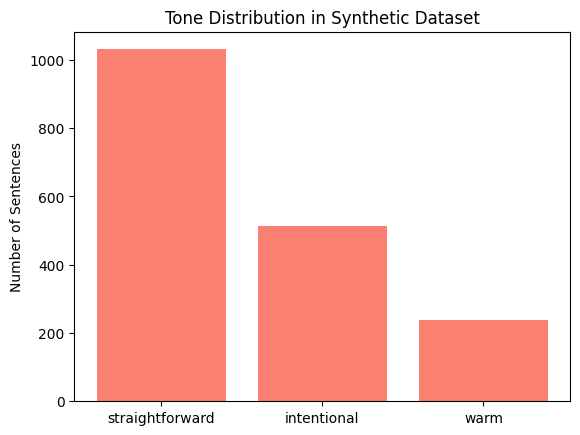

{'straightforward': np.int64(1031),
 'intentional': np.int64(513),
 'warm': np.int64(237)}

In [203]:
#Tone Distribution Bar Chart
tone_counts = {
    "straightforward": synthetic_df['straightforward'].sum(),
    "intentional": synthetic_df['intentional'].sum(),
    "warm": synthetic_df['warm'].sum()
}

plt.bar(tone_counts.keys(), tone_counts.values(), color='salmon')
plt.title("Tone Distribution in Synthetic Dataset")
plt.ylabel("Number of Sentences")
plt.show()

tone_counts

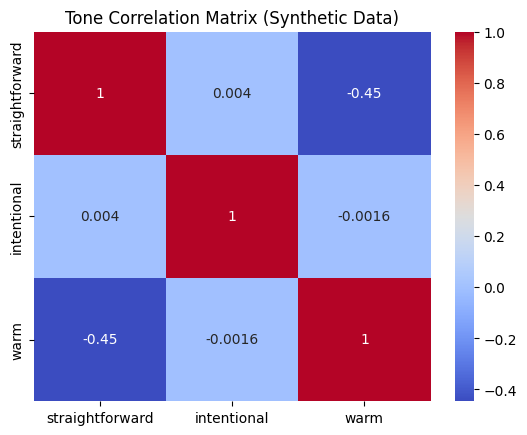

In [204]:
#Tone Correlation Matrix
corr = synthetic_df[['straightforward', 'intentional', 'warm']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Tone Correlation Matrix (Synthetic Data)")
plt.show()


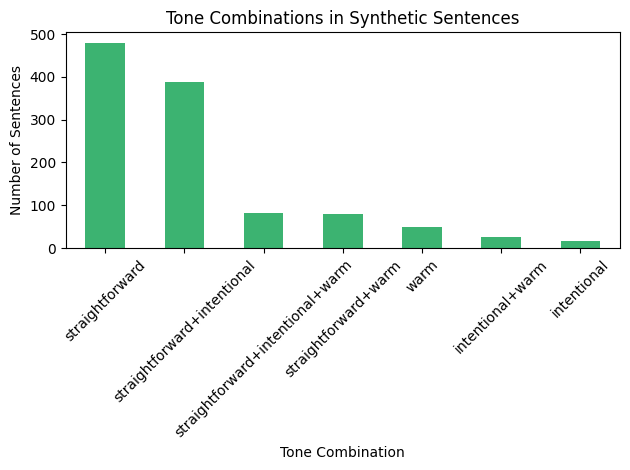

In [205]:
#Tone Combination Frequencies

def get_combo(row):
    combo = []
    if row['straightforward']: combo.append('straightforward')
    if row['intentional']: combo.append('intentional')
    if row['warm']: combo.append('warm')
    return '+'.join(combo)

synthetic_df['tone_combo'] = synthetic_df.apply(get_combo, axis=1)
combo_counts = synthetic_df['tone_combo'].value_counts()

combo_counts.plot(kind='bar', color='mediumseagreen')
plt.title("Tone Combinations in Synthetic Sentences")
plt.xlabel("Tone Combination")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


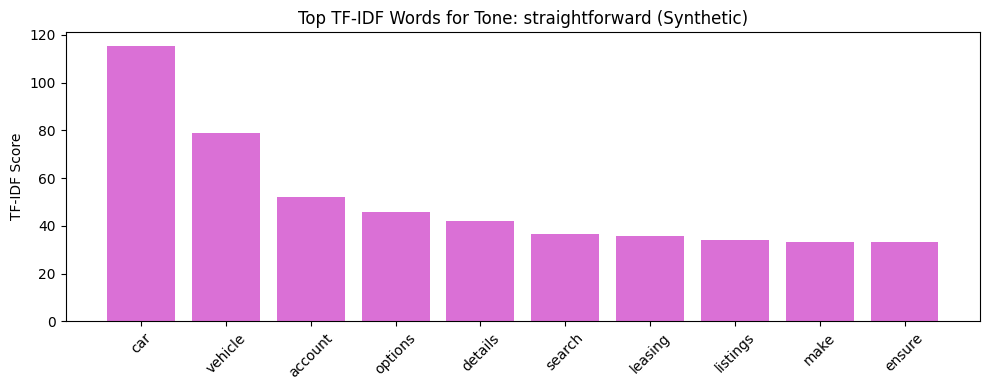

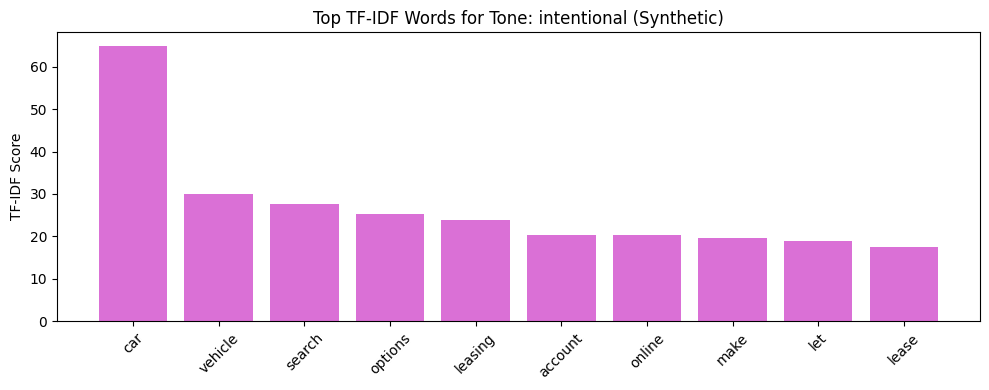

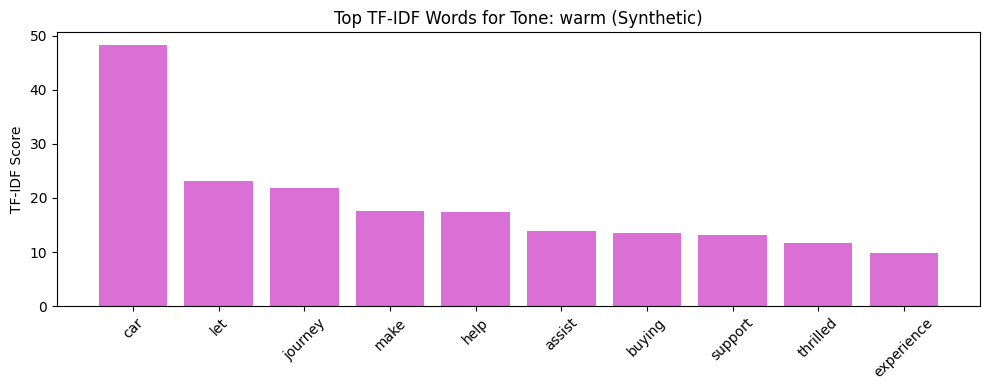

In [206]:
#TF-IDF Top Words per Tone


for tone in ['straightforward', 'intentional', 'warm']:
    tone_sentences = synthetic_df[synthetic_df[tone] == 1]['Sentence']
    vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
    X = vectorizer.fit_transform(tone_sentences)

    tfidf_scores = X.sum(axis=0).tolist()[0]
    word_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_scores))
    top_words = Counter(word_scores).most_common(10)

    words, scores = zip(*top_words)
    plt.figure(figsize=(10, 4))
    plt.bar(words, scores, color='orchid')
    plt.title(f"Top TF-IDF Words for Tone: {tone} (Synthetic)")
    plt.ylabel("TF-IDF Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

###  Balance Dataset

There are too many straightforward examples and not enough warm or intentional ones. Balancing makes sure the model learns each tone equally. I'm adding extra sentences under-represented tone combo until they all have about the same number of examples. This way each tone style is shown equally in the data.

In [207]:
def get_tone_combo(row):
    tones = []
    if row['straightforward'] == 1:
        tones.append("straightforward")
    if row['intentional'] == 1:
        tones.append("intentional")
    if row['warm'] == 1:
        tones.append("warm")
    return "+".join(tones)

final_dataset["tone_combo"] = final_dataset.apply(get_tone_combo, axis=1)

In [208]:
target_combos = [
    "intentional",
    "warm",
    "intentional+warm",
    "straightforward+warm",
    "straightforward+intentional+warm"
]

combo_examples = {
    combo: final_dataset[final_dataset["tone_combo"] == combo][["Sentence", "straightforward", "intentional", "warm"]]
    for combo in target_combos
}


In [209]:
formatted_prompts = {}

for combo, df in combo_examples.items():
    block = ""
    for _, row in df.iterrows():
        block += f"Sentence: {row['Sentence'].strip()}\n"
        block += f"Tone labels: straightforward={int(row['straightforward'])}, intentional={int(row['intentional'])}, warm={int(row['warm'])}\n\n"
    formatted_prompts[combo] = block.strip()


In [210]:
print(formatted_prompts['intentional+warm'])

Sentence: Of course you can, we understand this can be a daunting process.
Tone labels: straightforward=0, intentional=1, warm=1

Sentence: To get you behind the wheel of your new car without any fuss or faff.
Tone labels: straightforward=0, intentional=1, warm=1


In [211]:
#Generation Targets and Vocab Hints
combo_targets = {
    "intentional": 200,
    "warm": 250,
    "intentional+warm": 200,
    "straightforward+warm": 150,
    "straightforward+intentional+warm": 100,
}

vocab_hints = {
    "intentional": ["car", "online", "drive", "apply", "perfect"],
    "warm": ["help", "support", "time", "worry", "team"],
    "intentional+warm": ["help", "team", "confidence", "support", "drive"],
    "straightforward+warm": ["contact", "support", "worry", "we’re here", "valuation"],
    "straightforward+intentional+warm": ["guide", "apply", "help", "support", "drive"],
}


In [212]:
#Batch Generate for each defined combo:
import math
from openai import OpenAI

all_generated = []
balanced_csvPath = "/content/Tov_Dissertation_Data/SyntheticData/synthetic_tov_additional_balancing.csv"

regenerate = False

if regenerate:
    client = OpenAI(api_key= secret_value_0)

    for combo in target_combos:
        example_block = formatted_prompts[combo]
        target = combo_targets[combo]
        vocab = ", ".join(vocab_hints[combo])
        batch_size = 20
        n_batches = math.ceil(target / batch_size)

        for batch_idx in range(n_batches):
            current_n = batch_size if (batch_idx < n_batches - 1) else target - batch_size * (n_batches - 1)
            prompt = (
                "You are helping AutoTrader generate business-communication sentences in English.\n"
                "Each sentence must be labeled with three binary tone labels: straightforward, intentional, warm.\n"
                "Use the style and domain (leasing, car valuation, account management) seen in the example block below.\n\n"
                f"### Real examples for tone combo: {combo}\n\n"
                f"{example_block}\n\n"
                f"You may draw inspiration from words like: {vocab}.\n\n"
                f"Now generate {current_n} new, diverse sentences matching this exact tone combination.\n"
                f"Return each entry in this exact format (no extra text):\n"
                "Sentence: [your sentence here]\n"
                f"Tone labels: straightforward={'1' if 'straightforward' in combo else '0'}, intentional={'1' if 'intentional' in combo else '0'}, warm={'1' if 'warm' in combo else '0'}\n"
            )

            response = client.responses.create(model="gpt-4o", input=prompt)
            output = response.output_text.strip()

            # Parse the results
            entries = [e.strip() for e in output.split("Sentence: ") if e.strip()]
            for e in entries:
                if "\n" in e:
                    sent, labels = e.split("\n", 1)
                    labels_dict = {lbl.split("=")[0].strip(): int(lbl.split("=")[1]) for lbl in labels.replace("Tone labels:", "").split(",")}
                    row = {"Sentence": sent.strip(), **labels_dict, "tone_combo": combo}
                    all_generated.append(row)

    # Build DataFrame and save
    balanced_rows_df = pd.DataFrame(all_generated)
    balanced_rows_df = new_rows_df.drop_duplicates(subset="Sentence")
    balanced_rows_df.to_csv("/kaggle/working/synthetic_tov_additional_balancing.csv", index=False)
    print(f"Generated and saved {len(new_rows_df)} new balanced synthetic rows.")
else:
    try:
        balanced_rows_df = pd.read_csv(balanced_csvPath)
        print(f"Loaded existing balanced synthetic data: {len(balanced_rows_df)} rows")
    except FileNotFoundError:
        print("No saved data found. Set regenerate = True to generate new synthetic data.")

Loaded existing balanced synthetic data: 891 rows


In [213]:
print(balanced_rows_df.shape)
balanced_rows_df.columns

(891, 5)


Index(['Sentence', 'straightforward', 'intentional', 'warm', 'tone_combo'], dtype='object')

In [214]:
balanced_rows_df.head()

Sentence  straightforward  \
0  Reserve your test drive today for the perfect experience.                0   
1  Submit your application to unlock exclusive online deals.                0   
2              Act now to secure your ideal car lease offer.                0   
3          Schedule an appointment before the slots fill up.                0   
4            Click the link to confirm your account changes.                0   

   intentional  warm   tone_combo  
0            1     0  intentional  
1            1     0  intentional  
2            1     0  intentional  
3            1     0  intentional  
4            1     0  intentional

In [215]:
#Check for duplicates
dup_count = balanced_rows_df.duplicated(subset="Sentence").sum()
print(f"Duplicate sentences: {dup_count}")

Duplicate sentences: 0


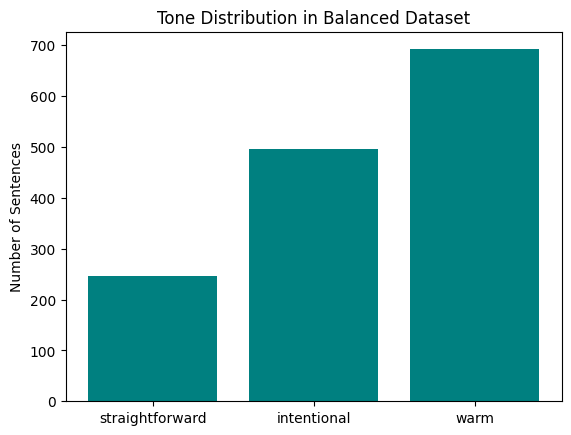

In [216]:
tone_counts = {
    "straightforward": balanced_rows_df['straightforward'].sum(),
    "intentional": balanced_rows_df['intentional'].sum(),
    "warm": balanced_rows_df['warm'].sum()
}
plt.bar(tone_counts.keys(), tone_counts.values(), color='teal')
plt.title("Tone Distribution in Balanced Dataset")
plt.ylabel("Number of Sentences")
plt.show()

In [217]:
#Ensure new balanced data doesn't repeat sentences in the existing

existing_sentences = set(synthetic_df['Sentence'])
overlap = balanced_rows_df['Sentence'].isin(existing_sentences).sum()
print(f"Sentences already in existing data: {overlap}")


Sentences already in existing data: 1


In [218]:
#Remove the dupicate row
balanced_rows_df = balanced_rows_df[~balanced_rows_df['Sentence'].isin(existing_sentences)]

In [219]:
test_csvPath = "/content/Tov_Dissertation_Data/SyntheticData/synthetic_tov_silver.csv"
regenerate = False
total_required = 300
batch_size = 30
n_batches = math.ceil(total_required / batch_size)

def generate_prompt(n):
    return f"""
You are helping AutoTrader generate realistic business communication sentences.

Each sentence must:
- Be in the UK automotive retail domain (leasing, car finance, valuation, account help).
- Be concise (10–25 words).
- Include binary tone labels: straightforward, intentional, warm.

Below are examples that show the tone styles and structure. Use them as a reference for formatting and tone understanding — but do not match their distribution.

Your goal is to generate a diverse set of sentences that express different combinations of the tones.

### Tone-labeled Examples:
{formatted_data}

Now generate {n} new original examples in this exact format:

Sentence: <your sentence>
Tone labels: straightforward=0/1, intentional=0/1, warm=0/1
"""

def parse_output(text):
    rows = []
    for block in text.strip().split("Sentence: "):
        if not block.strip():
            continue
        try:
            sentence, labels = block.strip().split("\n", 1)
            label_dict = {
                kv.split("=")[0].strip(): int(kv.split("=")[1].strip())
                for kv in labels.replace("Tone labels:", "").split(",")
            }
            rows.append({
                "Sentence": sentence.strip(),
                "straightforward": label_dict.get("straightforward", 0),
                "intentional": label_dict.get("intentional", 0),
                "warm": label_dict.get("warm", 0)
            })
        except:
            continue
    return rows

if regenerate:
    client = OpenAI(api_key=secret_value_0)
    all_rows = []

    for i in range(n_batches):
        print(f"Batch {i+1}/{n_batches}")
        prompt = generate_prompt(batch_size)
        try:
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7
            )
            output = response.choices[0].message.content.strip()
            all_rows += parse_output(output)
        except Exception as e:
            print(f"API error: {e}")
        time.sleep(3)

    df = pd.DataFrame(all_rows).drop_duplicates(subset="Sentence").head(total_required)
    df.to_csv(test_csvPath, index=False)
    print(f"✅ Saved {len(df)} rows to: {test_csvPath}")

else:
    silver_df = pd.read_csv(test_csvPath)
    print(f"✅ Loaded existing data: {silver_df.shape}")


✅ Loaded existing data: (325, 4)


In [220]:
#Combine Datasets
full_synthetic = pd.concat([synthetic_df, balanced_rows_df], ignore_index=True)
full_synthetic = full_synthetic.drop_duplicates(subset="Sentence")

full_synthetic = full_synthetic.sample(frac=1, random_state=42).reset_index(drop=True)

full_synthetic = full_synthetic.drop(columns=['tone_combo'], errors='ignore')
full_synthetic.shape

(2012, 4)

In [221]:
full_synthetic.head()

Sentence  straightforward  \
0     Check out swiftly to maximize your trade-in value.                0   
1     Enhance your car experience through expert advice.                1   
2           Just click to email us for more information.                1   
3       Remember, your satisfaction is our top priority.                0   
4  Discover an affordable leasing option that suits you.                1   

   intentional  warm  
0            1     0  
1            1     0  
2            1     0  
3            0     1  
4            1     0

In [222]:
full_synthetic.isna().sum()

Sentence           0
straightforward    0
intentional        0
warm               0
dtype: int64

**Comparison Plots**

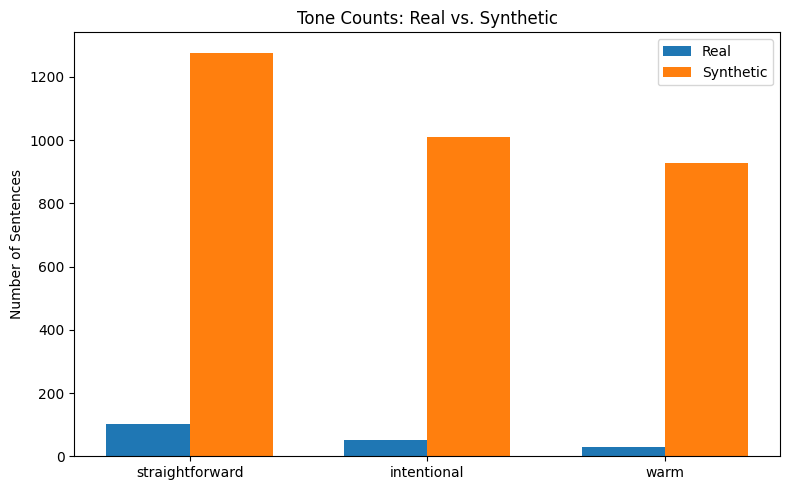

In [223]:
# Tone counts
real_counts = [final_dataset['straightforward'].sum(), final_dataset['intentional'].sum(), final_dataset['warm'].sum()]
synth_counts = [full_synthetic['straightforward'].sum(), full_synthetic['intentional'].sum(), full_synthetic['warm'].sum()]

labels = ['straightforward', 'intentional', 'warm']
x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, real_counts, width, label='Real', color='#1f77b4')
rects2 = ax.bar(x + width/2, synth_counts, width, label='Synthetic', color='#ff7f0e')

ax.set_ylabel('Number of Sentences')
ax.set_title('Tone Counts: Real vs. Synthetic')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


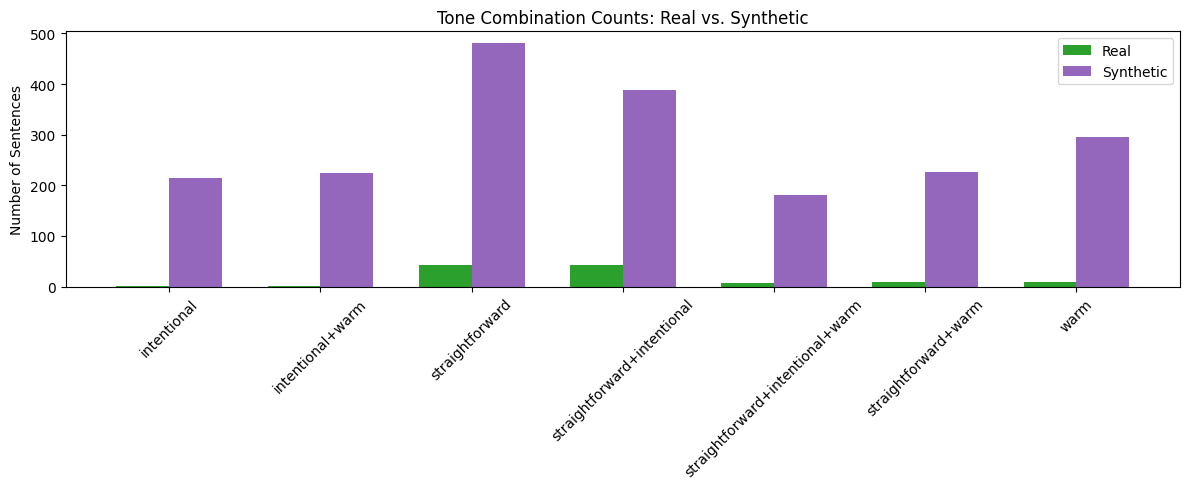

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure each dataset has 'tone_combo' column
def get_combo(row):
    return "+".join([tone for tone in ['straightforward', 'intentional', 'warm'] if row[tone] == 1])

final_dataset['tone_combo'] = final_dataset.apply(get_combo, axis=1)
full_synthetic['tone_combo'] = full_synthetic.apply(get_combo, axis=1)

# Get all unique combos present in either dataset
combos = sorted(set(final_dataset['tone_combo']).union(set(full_synthetic['tone_combo'])))

real_counts = final_dataset['tone_combo'].value_counts().reindex(combos, fill_value=0)
synth_counts = full_synthetic['tone_combo'].value_counts().reindex(combos, fill_value=0)

x = np.arange(len(combos))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
rects1 = ax.bar(x - width/2, real_counts, width, label='Real', color='#2ca02c')
rects2 = ax.bar(x + width/2, synth_counts, width, label='Synthetic', color='#9467bd')

ax.set_ylabel('Number of Sentences')
ax.set_title('Tone Combination Counts: Real vs. Synthetic')
ax.set_xticks(x)
ax.set_xticklabels(combos, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


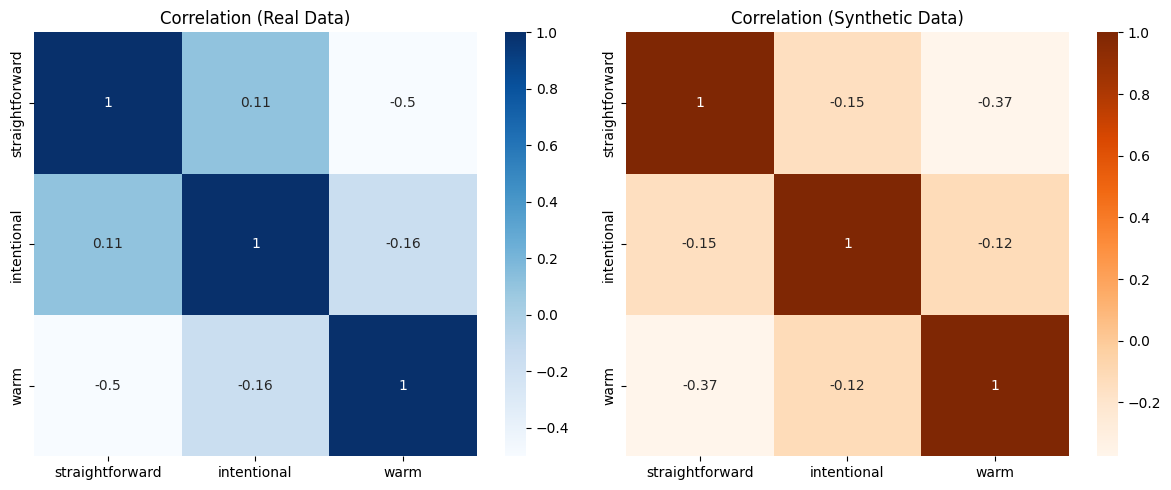

In [225]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(final_dataset[['straightforward','intentional','warm']].corr(), annot=True, cmap='Blues')
plt.title("Correlation (Real Data)")

plt.subplot(1,2,2)
sns.heatmap(full_synthetic[['straightforward','intentional','warm']].corr(), annot=True, cmap='Oranges')
plt.title("Correlation (Synthetic Data)")

plt.tight_layout()
plt.show()


The synthetic dataset preserves the tone relationships seen in the real data: straightforward and warm tones rarely appear together, and the three tone styles remain clearly distinct.

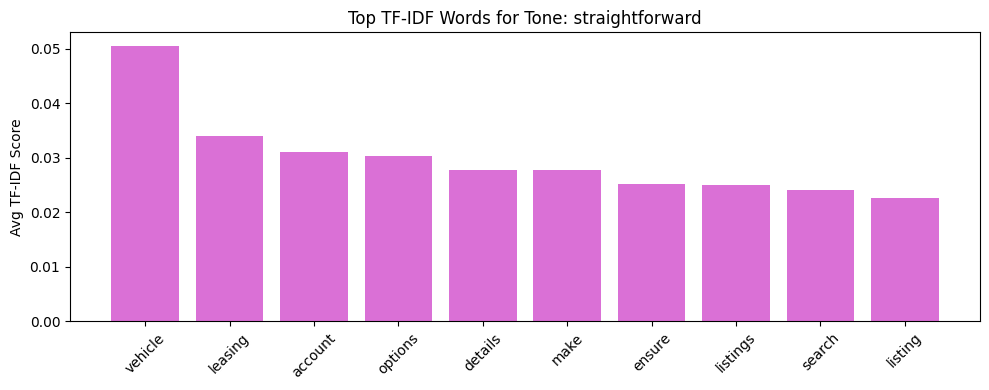

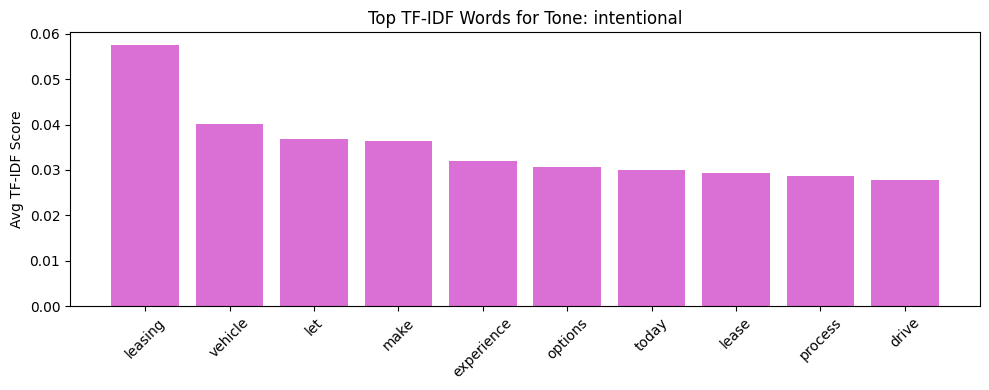

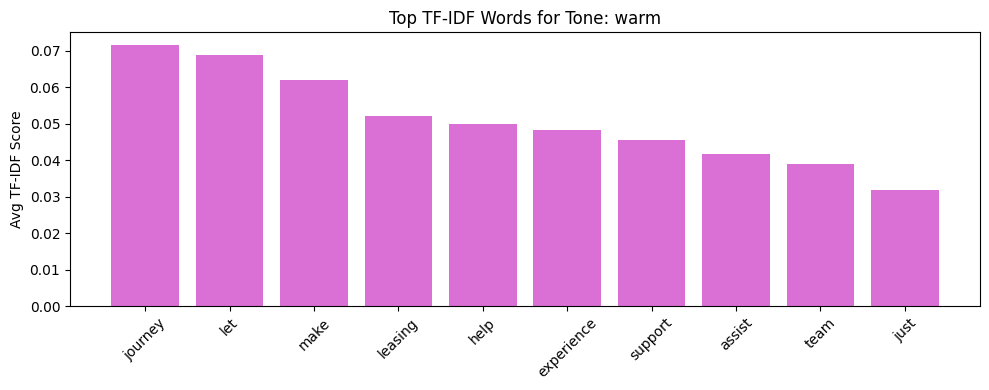

In [226]:
#TF-IDF Top Words per Tone

extra_stop = ['auto', 'trader', 'autotrader', 'car']
all_stop = list(ENGLISH_STOP_WORDS.union(extra_stop))

vectorizer = TfidfVectorizer(stop_words=all_stop, max_features=100)
X = vectorizer.fit_transform(full_synthetic['Sentence'])
vocab = vectorizer.get_feature_names_out()

for tone in ['straightforward', 'intentional', 'warm']:
    mask = full_synthetic[tone] == 1
    X_tone = X[mask.values]
    avg_tfidf = X_tone.mean(axis=0).A1
    word_scores = list(zip(vocab, avg_tfidf))
    top_words = sorted(word_scores, key=lambda x: x[1], reverse=True)[:10]
    words, scores = zip(*top_words)
    plt.figure(figsize=(10, 4))
    plt.bar(words, scores, color='orchid')
    plt.title(f"Top TF-IDF Words for Tone: {tone}")
    plt.ylabel("Avg TF-IDF Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

###  Data Filtering

#####  Sentence/Text Filtering

In [227]:
import re, json, hashlib, numpy as np, pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from tqdm import tqdm
tqdm.pandas()

In [228]:
#Filteration helpers
def length_ok(text, min_tok=6, max_tok=40):
    toks = re.findall(r"\w+|\S", str(text))
    return min_tok <= len(toks) <= max_tok

def too_repetitive(text, trigram_repeat=2):
    toks = re.findall(r"\w+|\S", str(text).lower())
    trigrams = [" ".join(toks[i:i+3]) for i in range(len(toks)-2)]
    counts = Counter(trigrams)
    return any(c >= trigram_repeat for c in counts.values())

In [229]:
df_human = final_dataset
df_silver = silver_df
df_synth_raw = full_synthetic

for d in (df_human, df_silver, df_synth_raw):
    d.dropna(subset=["Sentence"], inplace=True)
    d["Sentence"] = d["Sentence"].astype(str).str.strip()

#detect sentence duplicates
def sentence_fingerprint(sentence: str) -> str:
    return hashlib.sha1(str(sentence).strip().lower().encode("utf-8")).hexdigest()

for d in (df_human, df_silver, df_synth_raw):
    d["id_hash"] = d["Sentence"].apply(sentence_fingerprint)
    d.drop_duplicates(subset=["id_hash"], inplace=True)

print("Human:", df_human.shape,
      "Silver:", df_silver.shape,
      "Synthetic raw:", df_synth_raw.shape)

df_silver.head()


Human: (115, 8) Silver: (325, 5) Synthetic raw: (2012, 6)


Sentence  \
0                                 Find out what your car is worth with our free valuation tool.   
1             Explore flexible finance options tailored to your needs with our expert guidance.   
2                             Secure your deal online with just a few clicks, it's that simple!   
3                    Our team is here to support you through every step of the leasing process.   
4  Your feedback matters; we're here to ensure your buying experience is smooth and satisfying.   

   straightforward  intentional  warm  \
0                1            1     0   
1                1            1     0   
2                1            1     1   
3                1            1     1   
4                1            1     1   

                                    id_hash  
0  b0c33567f4adbe27fd550b472a436b2bd3bb6ee1  
1  79fdb226e9e7edee66c7e90f70067ebf8dc2d374  
2  270ed1407fe321c946aad06c06af218b0e2209d3  
3  bc506362418ece1d85bc1fb5a73f567337f626a9  
4  8389b0d9ebbd8b78d0713d511d13484ae4b2c9bc

In [230]:
#Extract keywords from human data
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

def extract_domain_keywords(
    texts,
    top_k=800,
    ngram_range=(1,2),
    min_df=4,          # term must appear ≥ 5
    max_df=0.8,        # ignore terms in >80%
    max_features=30000
):
    vec = TfidfVectorizer(
        lowercase=True,
        ngram_range=ngram_range,
        max_features=max_features,
        min_df=min_df,
        max_df=max_df,
        token_pattern=r"(?u)\b[\w-]+\b"
    )
    X = vec.fit_transform(texts)
    vocab = np.array(vec.get_feature_names_out())
    avg_tfidf = np.asarray(X.mean(axis=0)).ravel()

    #prioritize tokens with letters/numbers and length ≥ 3
    def looks_nounish(term):
        toks = term.split()
        return any(len(t) >= 3 and re.search(r"[A-Za-z0-9]", t) for t in toks)

    mask = np.array([looks_nounish(t) for t in vocab])
    if mask.any():
        vocab = vocab[mask]
        avg_tfidf = avg_tfidf[mask]

    idx = np.argsort(-avg_tfidf)[:top_k]
    return set(vocab[idx])

AUTO_KEYWORDS = extract_domain_keywords(
    df_human["Sentence"].astype(str).tolist(),
    top_k=800, ngram_range=(1,2), min_df=5, max_df=0.8
)

def is_on_topic(sentence: str) -> bool:
    t = str(sentence).lower()
    return any(k in t for k in AUTO_KEYWORDS)

len(AUTO_KEYWORDS), list(sorted(AUTO_KEYWORDS))[:30]



(60,
 ['about',
  'account',
  'advert',
  'all',
  'and',
  'are',
  'auto',
  'auto trader',
  'can',
  'car',
  'credit',
  'deal',
  'drive',
  'each',
  'email',
  'for',
  'from',
  'get',
  'have',
  'help',
  'help you',
  'here',
  'here to',
  'how',
  'if you',
  'in your',
  'just',
  'leasing',
  'like',
  'much'])

In [231]:
import re, hashlib
from collections import Counter

#This filter is to make sure the generated texts are on the same topic as the human data
# apply filters to synthetic data
df_synth_filtered = (
    df_synth_raw
      .assign(on_topic = df_synth_raw["Sentence"].astype(str).apply(is_on_topic),
              len_ok   = df_synth_raw["Sentence"].astype(str).apply(length_ok),
              rep_bad  = df_synth_raw["Sentence"].astype(str).apply(too_repetitive),
              id_hash  = df_synth_raw["Sentence"].astype(str).apply(sentence_fingerprint))
      .query("on_topic and len_ok and not rep_bad")
      .drop_duplicates(subset=["id_hash"])
      .reset_index(drop=True)
)
print("Synthetic raw:", len(df_synth_raw), "→ after keyword/quality filters:", len(df_synth_filtered))
df_synth_filtered.head(3)

Synthetic raw: 2012 → after keyword/quality filters: 1933


Sentence  straightforward  \
0  Check out swiftly to maximize your trade-in value.                0   
1  Enhance your car experience through expert advice.                1   
2        Just click to email us for more information.                1   

   intentional  warm                   tone_combo  \
0            1     0                  intentional   
1            1     0  straightforward+intentional   
2            1     0  straightforward+intentional   

                                    id_hash  on_topic  len_ok  rep_bad  
0  861db530a66fb04c221794828672e7f2dfc36462      True    True    False  
1  34dab961a57da4dcebf9ef00edc7c6cf9fae0c22      True    True    False  
2  a3943c701bdb3cc5ed04fbcffd64a9abaccb7ddf      True    True    False

In [232]:
# apply filters to silver data
df_silver_filtered = (
    df_silver
      .assign(on_topic = df_silver["Sentence"].astype(str).apply(is_on_topic),
              len_ok   = df_silver["Sentence"].astype(str).apply(length_ok),
              rep_bad  = df_silver["Sentence"].astype(str).apply(too_repetitive),
              id_hash  = df_silver["Sentence"].astype(str).apply(sentence_fingerprint))
      .query("on_topic and len_ok and not rep_bad")
      .drop_duplicates(subset=["id_hash"])
      .reset_index(drop=True)
)
print("Silver raw:", len(df_silver), "→ after keyword/quality filters:", len(df_silver_filtered))
df_silver_filtered.head(3)

Silver raw: 325 → after keyword/quality filters: 322


Sentence  \
0                      Find out what your car is worth with our free valuation tool.   
1  Explore flexible finance options tailored to your needs with our expert guidance.   
2                  Secure your deal online with just a few clicks, it's that simple!   

   straightforward  intentional  warm  \
0                1            1     0   
1                1            1     0   
2                1            1     1   

                                    id_hash  on_topic  len_ok  rep_bad  
0  b0c33567f4adbe27fd550b472a436b2bd3bb6ee1      True    True    False  
1  79fdb226e9e7edee66c7e90f70067ebf8dc2d374      True    True    False  
2  270ed1407fe321c946aad06c06af218b0e2209d3      True    True    False

In [233]:
full_synthetic = df_synth_filtered.copy()
silver_df = df_silver_filtered.copy()

### **Statistical Similarity to Real Data test**

### Statistical Comparison




In [234]:
from scipy.stats import chisquare

all_combos = [
    (0,0,0),
    (0,0,1),
    (0,1,0),
    (0,1,1),
    (1,0,0),
    (1,0,1),
    (1,1,0),
    (1,1,1)
]

def combo_counts(df):
    combos = df[['straightforward', 'intentional', 'warm']].apply(tuple, axis=1)
    counts = pd.Series(combos).value_counts().reindex(all_combos, fill_value=0).values
    return counts

real_counts = combo_counts(final_dataset)
synth_counts = combo_counts(full_synthetic)
real_scaled = real_counts * (synth_counts.sum() / real_counts.sum())

# Only keep combos where expected (real_scaled) > 0
mask = real_scaled > 0
filtered_real = real_scaled[mask]
filtered_synth = synth_counts[mask]

chi2, p = chisquare(f_obs=filtered_synth, f_exp=filtered_real)
print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")



Chi-squared: 2464.60, p-value: 0.0000


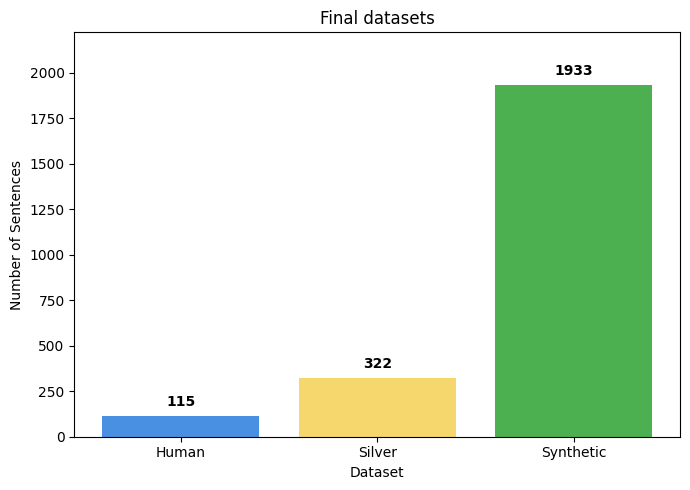

In [235]:
datasets = ["Human", "Silver", "Synthetic"]
sizes = [len(final_dataset), len(silver_df), len(full_synthetic)]

plt.figure(figsize=(7,5))
bars = plt.bar(datasets, sizes, color=["#4A90E2", "#F5D76E", "#4CAF50"])

for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.02*max(sizes)),
             str(size), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Final datasets", fontsize=12)
plt.ylabel("Number of Sentences")
plt.xlabel("Dataset")
plt.ylim(0, max(sizes)*1.15)

plt.tight_layout()
plt.show()


### Sentence Embeddings

Sentence embeddings use a vector system and group sentences by their meanings.

To see if real and synthetic sentences are semantically similar we have the plot below. If they overlap they are, otherwise they'll be different.

In [236]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

sentence_transfomer_model = SentenceTransformer('all-MiniLM-L6-v2')

real_embeddings = sentence_transfomer_model.encode(final_dataset['Sentence'].tolist())
synthetic_embeddings = sentence_transfomer_model.encode(full_synthetic['Sentence'].tolist())

real_embeddings = np.array(real_embeddings)
synthetic_embeddings = np.array(synthetic_embeddings)

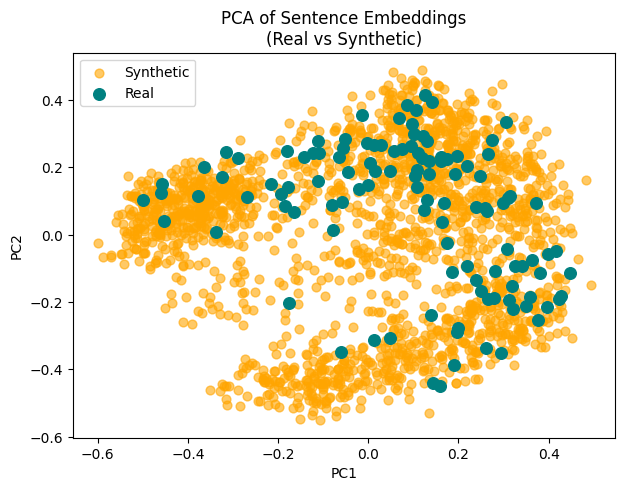

In [237]:
all_embeddings = np.vstack([real_embeddings, synthetic_embeddings])
labels = np.array(['Real'] * len(real_embeddings) + ['Synthetic'] * len(synthetic_embeddings))

pca = PCA(n_components=2)
all_2d = pca.fit_transform(all_embeddings)

plt.figure(figsize=(7,5))
plt.scatter(all_2d[labels=='Synthetic', 0], all_2d[labels=='Synthetic', 1], alpha=0.6, label='Synthetic', color='orange', s=40)
plt.scatter(all_2d[labels=='Real', 0], all_2d[labels=='Real', 1], alpha=1.0, label='Real', color='teal', s=70, zorder=10)

plt.legend()
plt.title("PCA of Sentence Embeddings\n(Real vs Synthetic)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


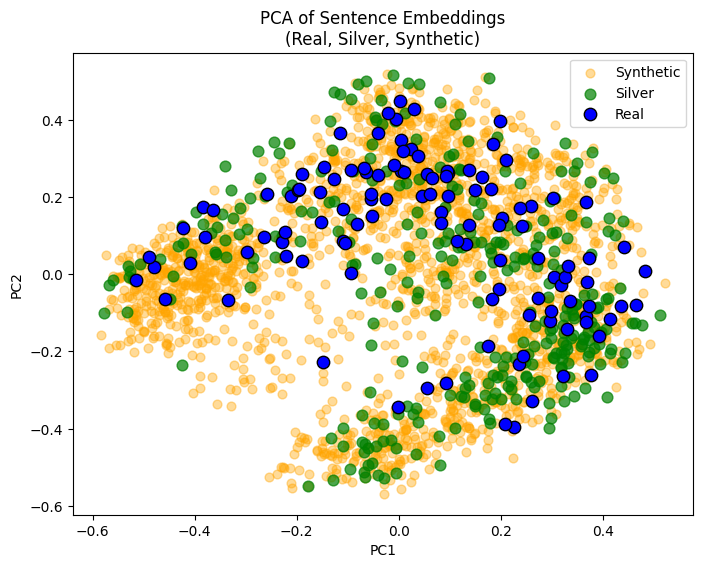

In [238]:
silver_embeddings = sentence_transfomer_model.encode(silver_df['Sentence'].tolist())
all_embeddings = np.vstack([real_embeddings, silver_embeddings, synthetic_embeddings])
labels = (['Real'] * len(real_embeddings) +
          ['Silver'] * len(silver_embeddings) +
          ['Synthetic'] * len(synthetic_embeddings))

pca = PCA(n_components=2)
all_2d = pca.fit_transform(all_embeddings)

plt.figure(figsize=(8,6))
plt.scatter(all_2d[np.array(labels)=='Synthetic',0], all_2d[np.array(labels)=='Synthetic',1],alpha=0.4, label='Synthetic', color='orange', s=40)
plt.scatter(all_2d[np.array(labels)=='Silver',0], all_2d[np.array(labels)=='Silver',1], alpha=0.7, label='Silver', color='green', s=60)
plt.scatter(all_2d[np.array(labels)=='Real',0], all_2d[np.array(labels)=='Real',1], alpha=1.0, label='Real', color='blue', edgecolors='k', s=80, zorder=10)
plt.legend()
plt.title("PCA of Sentence Embeddings\n(Real, Silver, Synthetic)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Joint Distribution

In [239]:
all_combos = [
    (0,0,0),
    (0,0,1),
    (0,1,0),
    (0,1,1),
    (1,0,0),
    (1,0,1),
    (1,1,0),
    (1,1,1)
]

def combo_counts(df):
    combos = df[['straightforward', 'intentional', 'warm']].apply(tuple, axis=1)
    counts = pd.Series(combos).value_counts().reindex(all_combos, fill_value=0).values
    return counts

real_counts = combo_counts(final_dataset)
silver_counts = combo_counts(silver_df)
synthetic_counts = combo_counts(full_synthetic)

combo_labels = [''.join(map(str, c)) for c in all_combos]  # for nice column names

dist_df = pd.DataFrame({
    'Combo': combo_labels,
    'Real': real_counts,
    'Silver': silver_counts,
    'Synthetic': synthetic_counts
})

print(dist_df)



  Combo  Real  Silver  Synthetic
0   000     0       0          0
1   001     9      41        290
2   010     2      13        211
3   011     2      29        224
4   100    43      27        441
5   101    10      55        221
6   110    42      97        366
7   111     7      60        180


My aim was to ensure the sentences are in the same domain and to have a balanced dataset for modelling.

## **Classification & Training**

In [ ]:
full_synthetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentence         1933 non-null   object
 1   straightforward  1933 non-null   int64 
 2   intentional      1933 non-null   int64 
 3   warm             1933 non-null   int64 
 4   tone_combo       1933 non-null   object
 5   id_hash          1933 non-null   object
 6   on_topic         1933 non-null   bool  
 7   len_ok           1933 non-null   bool  
 8   rep_bad          1933 non-null   bool  
dtypes: bool(3), int64(3), object(3)
memory usage: 96.4+ KB


In [ ]:
silver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentence         322 non-null    object
 1   straightforward  322 non-null    int64 
 2   intentional      322 non-null    int64 
 3   warm             322 non-null    int64 
 4   id_hash          322 non-null    object
 5   on_topic         322 non-null    bool  
 6   len_ok           322 non-null    bool  
 7   rep_bad          322 non-null    bool  
dtypes: bool(3), int64(3), object(2)
memory usage: 13.7+ KB


In [ ]:
!pip install iterative-stratification

In [ ]:
from sklearn.model_selection import train_test_split
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

final_dataset['source'] = 'real'
full_synthetic['source'] = 'synthetic'
silver_df['source'] = 'silver'

all_data = pd.concat([final_dataset, full_synthetic, silver_df], ignore_index=True)

features = ['Sentence', 'straightforward', 'intentional', 'warm', 'source']

real_data = all_data[all_data['source'] == 'real'][features]
silver_data = all_data[all_data['source'] == 'silver'][features]
synthetic_data = all_data[all_data['source'] == 'synthetic'][features]

real_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentence         115 non-null    object
 1   straightforward  115 non-null    int64 
 2   intentional      115 non-null    int64 
 3   warm             115 non-null    int64 
 4   source           115 non-null    object
dtypes: int64(3), object(2)
memory usage: 5.4+ KB


In [ ]:
#Split real data into 20% train
real_X = real_data['Sentence'].values
real_y = real_data[['straightforward', 'intentional', 'warm']]

msss1 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=42)
trainval_idx, test_idx = next(msss1.split(real_X, real_y))

trainval_real = real_data.iloc[trainval_idx].reset_index(drop=True)
test_real     = real_data.iloc[test_idx].reset_index(drop=True)

#Validation set
X_val = trainval_real['Sentence'].values
Y_val = trainval_real[['straightforward', 'intentional', 'warm']].values

msss2 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
train_idx, val_idx = next(msss2.split(X_val, Y_val))

train_real = trainval_real.iloc[train_idx].reset_index(drop=True)
val_real   = trainval_real.iloc[val_idx].reset_index(drop=True)

#Silver validation set
silver_X = silver_data['Sentence'].values
silver_y = silver_data[['straightforward', 'intentional', 'warm']]

msss3 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
silver_train_idx, silver_val_idx = next(msss3.split(silver_X, silver_y))

silver_train = silver_data.iloc[silver_train_idx].reset_index(drop=True)
silver_val = silver_data.iloc[silver_val_idx].reset_index(drop=True)

#Final Concatenation
train_set = pd.concat([train_real, silver_train, synthetic_data], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)
val_set = pd.concat([val_real, silver_val], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)
test_set = test_real.reset_index(drop=True)

print(f"Train set: {len(train_set)} (real={len(train_real)}, silver={len(silver_train)}, synthetic={len(synthetic_data)})")
print(f"Validation set: {len(val_set)} (real={len(val_real)}, silver={len(silver_val)})")
print(f"Test set (real only): {len(test_set)}")


Train set: 2135 (real=12, silver=190, synthetic=1933)
Validation set: 144 (real=12, silver=132)
Test set (real only): 91


In [ ]:
train_set = train_set.copy()
test_set = test_set.copy()
val_set = val_set.copy()

train_set['Sentence'] = train_set['Sentence'].apply(clean_text)
test_set['Sentence'] = test_set['Sentence'].apply(clean_text)
val_set['Sentence'] = val_set['Sentence'].apply(clean_text)

In [ ]:
#Using a vectorizer because models can't work directly with texts
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(train_set['Sentence'])
X_val = vectorizer.transform(val_set['Sentence'])
X_test = vectorizer.transform(test_set['Sentence'])

y_train = train_set[['straightforward', 'intentional', 'warm']]
y_val = val_set[['straightforward', 'intentional', 'warm']]
y_test = test_set[['straightforward', 'intentional', 'warm']]

### **LogisticRegression**

In [ ]:
#OneVsResrClassifier is a helper that lets you use any normal classifier
#to handle problems with more than one label. It works by training one model
#for each tone, so you get a separate prediction for each label.

In [ ]:
#Logistic Regression handles high-dimensional, sparse data efficiently

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, f1_score

In [ ]:
lr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs'))
lr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                 random_state=42))

In [ ]:
lr_pred = lr_clf.predict(X_test)

In [ ]:
print("LogisticRegression Classification report:\n")
print(classification_report(y_test, lr_pred, target_names=['straightforward', 'intentional', 'warm']))
print("Macro F1:", f1_score(y_test, lr_pred, average='macro'))
print("Micro F1:", f1_score(y_test, lr_pred, average='micro'))

LogisticRegression Classification report:

                 precision    recall  f1-score   support

straightforward       0.91      0.87      0.89        82
    intentional       0.68      0.71      0.70        42
           warm       0.50      0.73      0.59        22

      micro avg       0.76      0.80      0.78       146
      macro avg       0.70      0.77      0.73       146
   weighted avg       0.78      0.80      0.79       146
    samples avg       0.79      0.83      0.78       146

Macro F1: 0.7259223370657479
Micro F1: 0.78


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **RandomForestClassifier**

In [ ]:
#Random Forest captures nonlinear relationships between features and labels
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf_clf.predict(X_test)

In [ ]:
print("RandomForest Classification report:\n")
print(classification_report(y_test, rf_pred, target_names=['straightforward', 'intentional', 'warm']))
print("Macro F1:", f1_score(y_test, rf_pred, average='macro'))
print("Micro F1:", f1_score(y_test, rf_pred, average='micro'))

RandomForest Classification report:

                 precision    recall  f1-score   support

straightforward       0.94      0.83      0.88        82
    intentional       0.61      0.60      0.60        42
           warm       0.39      0.73      0.51        22

      micro avg       0.71      0.75      0.73       146
      macro avg       0.65      0.72      0.66       146
   weighted avg       0.76      0.75      0.75       146
    samples avg       0.73      0.77      0.71       146

Macro F1: 0.6644876765358693
Micro F1: 0.7266666666666667


### **Multinomial Naive Bayes (MNB)**

In [ ]:
#This is commonly used for text classification

Using the OneVsRestClassifier because the MNB is typically for multiclass where each text expects one of the 3 available labels while this is a Multilabel classification; each text is a combination of labels.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = OneVsRestClassifier(MultinomialNB())
mnb_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [ ]:
mnb_preds  = mnb_clf.predict(X_test)

print("Multinomial Naive Bayes Classification Report:\n")
print(classification_report(y_test, mnb_preds, target_names=['straightforward', 'intentional', 'warm']))
print("Macro F1-score:", f1_score(y_test, mnb_preds, average='macro'))
print("Micro F1-score:", f1_score(y_test, mnb_preds, average='micro'))

Multinomial Naive Bayes Classification Report:

                 precision    recall  f1-score   support

straightforward       0.93      0.79      0.86        82
    intentional       0.60      0.74      0.66        42
           warm       0.43      0.82      0.56        22

      micro avg       0.70      0.78      0.74       146
      macro avg       0.65      0.78      0.69       146
   weighted avg       0.76      0.78      0.75       146
    samples avg       0.71      0.80      0.72       146

Macro F1-score: 0.6924458753266144
Micro F1-score: 0.7354838709677419


### **MLP Pipeline**

In [ ]:
#This is a multi layer neural network. It would pick up patterns simple
#models would miss.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

In [ ]:
#Convert to numpy array
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()
y_train_array = y_train.values
y_test_array = y_test.values

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_array, y_train_array, test_size=0.2, random_state=42
)

In [ ]:
#The model
mlp_model = Sequential([
    Input(shape=(X_train_array.shape[1],)),
    Dense(64, activation='relu'),  #hidden layer
    Dropout(0.3),
    Dense(3, activation='sigmoid')  # Output layer
])

mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # multi-label loss
    metrics=['accuracy']
)

In [ ]:
history = mlp_model.fit(
    X_train_split, y_train_split,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

Epoch 1/20
54/54 - 12s - 216ms/step - accuracy: 0.5527 - loss: 0.6826 - val_accuracy: 0.6417 - val_loss: 0.6671
Epoch 2/20
54/54 - 1s - 10ms/step - accuracy: 0.6393 - loss: 0.6430 - val_accuracy: 0.6557 - val_loss: 0.6210
Epoch 3/20
54/54 - 1s - 10ms/step - accuracy: 0.6405 - loss: 0.5838 - val_accuracy: 0.6347 - val_loss: 0.5620
Epoch 4/20
54/54 - 1s - 9ms/step - accuracy: 0.6347 - loss: 0.5131 - val_accuracy: 0.6276 - val_loss: 0.5070
Epoch 5/20
54/54 - 1s - 12ms/step - accuracy: 0.6317 - loss: 0.4524 - val_accuracy: 0.6323 - val_loss: 0.4661
Epoch 6/20
54/54 - 0s - 8ms/step - accuracy: 0.6311 - loss: 0.4059 - val_accuracy: 0.6183 - val_loss: 0.4394
Epoch 7/20
54/54 - 1s - 15ms/step - accuracy: 0.6253 - loss: 0.3684 - val_accuracy: 0.6066 - val_loss: 0.4222
Epoch 8/20
54/54 - 1s - 10ms/step - accuracy: 0.6311 - loss: 0.3395 - val_accuracy: 0.6089 - val_loss: 0.4114
Epoch 9/20
54/54 - 1s - 10ms/step - accuracy: 0.6370 - loss: 0.3129 - val_accuracy: 0.6042 - val_loss: 0.4037
Epoch 10/2

In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = mlp_model.predict(X_test_array)
mlp_preds  = (y_pred_probs > 0.5).astype(int)

print("Multi-Layer Perceptron: \n")
print(classification_report(y_test_array, mlp_preds, target_names=['straightforward', 'intentional', 'warm']))
print("Macro F1:", f1_score(y_test_array, mlp_preds, average='macro'))
print("Micro F1:", f1_score(y_test_array, mlp_preds, average='micro'))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step
Multi-Layer Perceptron: 

                 precision    recall  f1-score   support

straightforward       0.92      0.72      0.81        82
    intentional       0.64      0.64      0.64        42
           warm       0.50      0.77      0.61        22

      micro avg       0.74      0.71      0.72       146
      macro avg       0.69      0.71      0.69       146
   weighted avg       0.78      0.71      0.73       146
    samples avg       0.74      0.74      0.71       146

Macro F1: 0.6860730593607306
Micro F1: 0.7202797202797203


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Automated Hyperparameter Tuning with KerasTuner**

In [ ]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_array.shape[1],)))
    # Hidden layer
    model.add(Dense(
        units=hp.Int('units2', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout2', 0.0, 0.5, step=0.1)))
    # Output layer
    model.add(Dense(3, activation='sigmoid'))

    lr = hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
#Setup the Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=15,
    executions_per_trial=1,
    overwrite=True,
    directory='tuner_dir',
    project_name='mlp_tone'
)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
tuner.search(
    X_train_split, y_train_split,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=2
)

Trial 15 Complete [00h 00m 10s]
val_loss: 0.3930380046367645

Best val_loss So Far: 0.3930380046367645
Total elapsed time: 00h 03m 25s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:", best_hp.values)

y_pred_probs = best_model.predict(X_test_array)
mlp_preds = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test_array, mlp_preds, target_names=['straightforward', 'intentional', 'warm']))
print("Macro F1-score:", f1_score(y_test_array, mlp_preds, average='macro'))
print("Micro F1-score:", f1_score(y_test_array, mlp_preds, average='micro'))


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best hyperparameters: {'units2': 128, 'dropout2': 0.0, 'learning_rate': 0.0005}
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
                 precision    recall  f1-score   support

straightforward       0.91      0.73      0.81        82
    intentional       0.64      0.64      0.64        42
           warm       0.50      0.73      0.59        22

      micro avg       0.74      0.71      0.72       146
      macro avg       0.68      0.70      0.68       146
   weighted avg       0.77      0.71      0.73       146
    samples avg       0.74      0.74      0.71       146

Macro F1-score: 0.6820868487535154
Micro F1-score: 0.7202797202797203


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Transformer Based Model: DistlBERT**



In [ ]:
!pip install --upgrade transformers --quiet
!pip install scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 8.7 MB/s eta 0:00:00


In [ ]:
import transformers
import time
from skmultilearn.model_selection import iterative_train_test_split


train_texts_tbm = train_set['Sentence'].tolist()
val_texts_tbm   = val_set['Sentence'].tolist()
test_texts_tbm  = test_set['Sentence'].tolist()

y_train_tbm = train_set[['straightforward','intentional','warm']].astype(int).values
y_val_tbm   = val_set[['straightforward','intentional','warm']].astype(int).values
y_test_tbm  = test_set[['straightforward','intentional','warm']].astype(int).values

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts_tbm, truncation=True, padding=True, max_length=128)
val_encodings   = tokenizer(val_texts_tbm, truncation=True, padding=True, max_length=128)
test_encodings  = tokenizer(test_texts_tbm, truncation=True, padding=True, max_length=128)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
import torch

class ToneDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = ToneDataset(train_encodings, y_train_tbm)
val_dataset   = ToneDataset(val_encodings, y_val_tbm)
test_dataset  = ToneDataset(test_encodings, y_test_tbm)


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer


model = AutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=3,
    problem_type="multi_label_classification"
)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    logging_dir='./logs',
    learning_rate=2e-5,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none"
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.sigmoid(torch.tensor(logits)).numpy()
    preds = (probs > 0.5).astype(int)
    labels = labels.astype(int)
    macro_f1 = f1_score(labels, preds, average='macro', zero_division=0)
    micro_f1 = f1_score(labels, preds, average='micro', zero_division=0)
    return {"macro_f1": macro_f1, "micro_f1": micro_f1}

wandb api key: 1defd965fbc8d1b1fdb76e23af585379ac65f627

In [ ]:
#Model training
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

trainer.train()

/tmp/ipython-input-2582891005.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=536, training_loss=0.3598253513450053, metrics={'train_runtime': 65.0777, 'train_samples_per_second': 131.228, 'train_steps_per_second': 8.236, 'total_flos': 92801277117360.0, 'train_loss': 0.3598253513450053, 'epoch': 4.0})

In [ ]:
#Val set evluation
val_results = trainer.evaluate(eval_dataset=val_dataset)
print("Validation results:", val_results)

Validation results: {'eval_loss': 0.44113337993621826, 'eval_macro_f1': 0.8377387433019341, 'eval_micro_f1': 0.8351648351648352, 'eval_runtime': 0.2353, 'eval_samples_per_second': 611.862, 'eval_steps_per_second': 21.245, 'epoch': 4.0}


In [ ]:
predictions = trainer.predict(test_dataset)

logits = predictions.predictions
probs = torch.sigmoid(torch.tensor(logits)).numpy()
preds_distilbert = (probs > 0.5).astype(int)

print("DistilBERT Classification Report:")
print(classification_report(y_test_tbm, preds_distilbert, target_names=['straightforward', 'intentional', 'warm']))
print("Macro F1:", f1_score(y_test_tbm, preds_distilbert, average='macro', zero_division=0))
print("Micro F1:", f1_score(y_test_tbm, preds_distilbert, average='micro', zero_division=0))

DistilBERT Classification Report:
                 precision    recall  f1-score   support

straightforward       0.96      0.85      0.90        82
    intentional       0.60      0.62      0.61        42
           warm       0.58      0.86      0.69        22

      micro avg       0.77      0.79      0.78       146
      macro avg       0.71      0.78      0.74       146
   weighted avg       0.80      0.79      0.79       146
    samples avg       0.82      0.83      0.79       146

Macro F1: 0.7352998677476856
Micro F1: 0.7796610169491526


### **Transformer Based Model: RoBERTA**


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('roberta-base')

train_encodings_rb = tokenizer(train_texts_tbm, truncation=True, padding=True, max_length=128)
val_encodings_rb = tokenizer(val_texts_tbm, truncation=True, padding=True, max_length=128)
test_encodings_rb = tokenizer(test_texts_tbm, truncation=True, padding=True, max_length=128)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
train_dataset_roberta = ToneDataset(train_encodings_rb, y_train_tbm)
val_dataset_roberta = ToneDataset(val_encodings_rb, y_val_tbm)
test_dataset_roberta = ToneDataset(test_encodings_rb, y_test_tbm)

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model_roberta = AutoModelForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=3,
    problem_type="multi_label_classification"
)

training_args_roberta = TrainingArguments(
    output_dir='./results_roberta',
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    logging_dir='./logs_roberta',
    learning_rate=2e-5,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none"
)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer_roberta = Trainer(
    model=model_roberta,
    args=training_args_roberta,
    train_dataset=train_dataset_roberta,
    eval_dataset=val_dataset_roberta,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

trainer_roberta.train()

/tmp/ipython-input-735198661.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_roberta = Trainer(


TrainOutput(global_step=536, training_loss=0.3135996256301652, metrics={'train_runtime': 123.7394, 'train_samples_per_second': 69.016, 'train_steps_per_second': 4.332, 'total_flos': 193100581729440.0, 'train_loss': 0.3135996256301652, 'epoch': 4.0})

In [ ]:
#Val set evaluation
val_results_roberta = trainer_roberta.evaluate(eval_dataset=val_dataset_roberta)
print("RoBERTa Validation results:", val_results_roberta)

RoBERTa Validation results: {'eval_loss': 0.4867008924484253, 'eval_macro_f1': 0.8448130381740871, 'eval_micro_f1': 0.8413547237076648, 'eval_runtime': 0.3256, 'eval_samples_per_second': 442.328, 'eval_steps_per_second': 15.359, 'epoch': 4.0}


In [ ]:
predictions_roberta = trainer_roberta.predict(test_dataset_roberta)

logits_roberta = predictions_roberta.predictions
probs_roberta = torch.sigmoid(torch.tensor(logits_roberta)).numpy()
preds_roberta = (probs_roberta > 0.5).astype(int)

print("RoBERTa Test Classification Report:")
print(classification_report(y_test_tbm, preds_roberta, target_names=['straightforward', 'intentional', 'warm']))
print("RoBERTa Macro F1:", f1_score(y_test_tbm, preds_roberta, average='macro', zero_division=0))
print("RoBERTa Micro F1:", f1_score(y_test_tbm, preds_roberta, average='micro', zero_division=0))


RoBERTa Test Classification Report:
                 precision    recall  f1-score   support

straightforward       0.96      0.93      0.94        82
    intentional       0.64      0.60      0.62        42
           warm       0.69      0.91      0.78        22

      micro avg       0.82      0.83      0.83       146
      macro avg       0.76      0.81      0.78       146
   weighted avg       0.83      0.83      0.83       146
    samples avg       0.86      0.86      0.83       146

RoBERTa Macro F1: 0.7818990183298226
RoBERTa Micro F1: 0.825938566552901


### **Transformer Based Model: XLNET**


In [240]:
from transformers import AutoTokenizer

tokenizer_xlnet = AutoTokenizer.from_pretrained('xlnet-base-cased')

train_encodings_xlnet = tokenizer_xlnet(train_texts_tbm, truncation=True, padding=True, max_length=128)
val_encodings_xlnet = tokenizer_xlnet(val_texts_tbm, truncation=True, padding=True, max_length=128)
test_encodings_xlnet = tokenizer_xlnet(test_texts_tbm, truncation=True, padding=True, max_length=128)

train_dataset_xlnet = ToneDataset(train_encodings_xlnet, y_train_tbm)
val_dataset_xlnet = ToneDataset(val_encodings_xlnet, y_val_tbm)
test_dataset_xlnet = ToneDataset(test_encodings_xlnet, y_test_tbm)

In [241]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model_xlnet = AutoModelForSequenceClassification.from_pretrained(
    'xlnet-base-cased',
    num_labels=3,
    problem_type="multi_label_classification"
)

training_args_xlnet = TrainingArguments(
    output_dir='./results_xlnet',
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    logging_dir='./logs_xlnet',
    learning_rate=2e-5,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none"
)


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [242]:
trainer_xlnet = Trainer(
    model=model_xlnet,
    args=training_args_xlnet,
    train_dataset=train_dataset_xlnet,
    eval_dataset=val_dataset_xlnet,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer_xlnet
)

trainer_xlnet.train()

/tmp/ipython-input-4220741143.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_xlnet = Trainer(


TrainOutput(global_step=536, training_loss=0.38528150409015255, metrics={'train_runtime': 132.8695, 'train_samples_per_second': 64.274, 'train_steps_per_second': 4.034, 'total_flos': 199573644538800.0, 'train_loss': 0.38528150409015255, 'epoch': 4.0})

In [243]:
#Val set evaluation
val_results_xlnet = trainer_xlnet.evaluate(eval_dataset=val_dataset_xlnet)
print("XLNet Validation results:", val_results_xlnet)

XLNet Validation results: {'eval_loss': 0.434333473443985, 'eval_macro_f1': 0.8430810037796427, 'eval_micro_f1': 0.8395522388059702, 'eval_runtime': 0.3904, 'eval_samples_per_second': 368.819, 'eval_steps_per_second': 12.806, 'epoch': 4.0}


In [244]:
predictions_xlnet = trainer_xlnet.predict(test_dataset_xlnet)

logits_xlnet = predictions_xlnet.predictions
probs_xlnet = torch.sigmoid(torch.tensor(logits_xlnet)).numpy()
preds_xlnet = (probs_xlnet > 0.5).astype(int)

print("XLNet Test Classification Report:")
print(classification_report(y_test_tbm, preds_xlnet, target_names=['straightforward', 'intentional', 'warm']))
print("XLNet Macro F1:", f1_score(y_test_tbm, preds_xlnet, average='macro', zero_division=0))
print("XLNet Micro F1:", f1_score(y_test_tbm, preds_xlnet, average='micro', zero_division=0))

XLNet Test Classification Report:
                 precision    recall  f1-score   support

straightforward       1.00      0.76      0.86        82
    intentional       0.62      0.60      0.61        42
           warm       0.55      0.95      0.70        22

      micro avg       0.77      0.74      0.76       146
      macro avg       0.73      0.77      0.72       146
   weighted avg       0.82      0.74      0.76       146
    samples avg       0.79      0.78      0.75       146

XLNet Macro F1: 0.7236224028906957
XLNet Micro F1: 0.7552447552447552


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Model Evaluation & Comparison**

In [ ]:
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score

model_predictions = {
    'Logistic Regression': lr_pred,
    'Random Forest': rf_pred,
    'Naive Bayes': mnb_preds,
    'MLP Pipeline': mlp_preds,
    'DistilBERT': preds_distilbert,
    'RoBERTa': preds_roberta,
    'XLNet': preds_xlnet
}


In [ ]:
def calculate_all_metrics(y_true, y_pred, model_name):
    metrics = {}

    metrics['Macro F1'] = f1_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['Micro F1'] = f1_score(y_true, y_pred, average='micro', zero_division=0)
    metrics['Weighted F1'] = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    metrics['Macro Precision'] = precision_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['Micro Precision'] = precision_score(y_true, y_pred, average='micro', zero_division=0)

    metrics['Macro Recall'] = recall_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['Micro Recall'] = recall_score(y_true, y_pred, average='micro', zero_division=0)

    metrics['Hamming Loss'] = hamming_loss(y_true, y_pred)
    metrics['Exact Match Ratio'] = accuracy_score(y_true, y_pred)

    return metrics


In [ ]:
results_data = []
detailed_reports = {}

for model_name, predictions in model_predictions.items():
    metrics = calculate_all_metrics(y_test_array, predictions, model_name)
    metrics['Model'] = model_name
    results_data.append(metrics)

    detailed_reports[model_name] = classification_report(
        y_test_tbm, predictions,
        target_names=['straightforward', 'intentional', 'warm'],
        output_dict=True
    )

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results_df = pd.DataFrame(results_data)
results_df = results_df.set_index('Model')

results_sorted = results_df.sort_values('Macro F1', ascending=False)

In [ ]:
print("MODEL PERFORMANCE RANKINGS")
print("Ranked by Macro F1 Score")
print("-" * 60)

for i, (model, row) in enumerate(results_sorted.iterrows(), 1):
    if i == 1:
        status = "BEST"
    elif i == len(results_sorted):
        status = "WORST"
    else:
        status = f"#{i}"

    print(f"{status:10} {model:20} | Macro F1: {row['Macro F1']:.4f} | Micro F1: {row['Micro F1']:.4f}")



MODEL PERFORMANCE RANKINGS
Ranked by Macro F1 Score
------------------------------------------------------------
BEST       RoBERTa              | Macro F1: 0.7819 | Micro F1: 0.8259
#2         XLNet                | Macro F1: 0.7454 | Micro F1: 0.7873
#3         DistilBERT           | Macro F1: 0.7353 | Micro F1: 0.7797
#4         Logistic Regression  | Macro F1: 0.7259 | Micro F1: 0.7800
#5         Naive Bayes          | Macro F1: 0.6924 | Micro F1: 0.7355
#6         MLP Pipeline         | Macro F1: 0.6821 | Micro F1: 0.7203
WORST      Random Forest        | Macro F1: 0.6645 | Micro F1: 0.7267


In [ ]:
print("\nDETAILED METRICS COMPARISON")
print("=" * 100)

key_metrics = [
    'Macro F1',
    'Micro F1',
    'Macro Precision',  # How often positive predictions are correct
    'Macro Recall',     # How many actual positives are found
    'Hamming Loss',     # Fraction of wrong labels
    'Exact Match Ratio' # All labels exactly right
]

display_df = results_sorted[key_metrics].round(4)
print(display_df.to_string())




DETAILED METRICS COMPARISON
                     Macro F1  Micro F1  Macro Precision  Macro Recall  Hamming Loss  Exact Match Ratio
Model                                                                                                  
RoBERTa                0.7819    0.8259           0.7642        0.8104        0.1868             0.5714
XLNet                  0.7454    0.7873           0.6845        0.8265        0.2454             0.4176
DistilBERT             0.7353    0.7797           0.7131        0.7788        0.2381             0.4615
Logistic Regression    0.7259    0.7800           0.6974        0.7691        0.2418             0.4505
Naive Bayes            0.6924    0.7355           0.6511        0.7830        0.3004             0.3736
MLP Pipeline           0.6821    0.7203           0.6840        0.7006        0.2930             0.3956
Random Forest          0.6645    0.7267           0.6481        0.7173        0.3004             0.3407


In [ ]:
print("\n PER-CLASS PERFORMANCE ANALYSIS")
print("Using Detailed Classification Reports")
print("-" * 70)

per_class_data = []
for model_name, report in detailed_reports.items():
    model_data = {
        'Model': model_name,
        'Straightforward_F1': report['straightforward']['f1-score'],
        'Intentional_F1': report['intentional']['f1-score'],
        'Warm_F1': report['warm']['f1-score'],
        'Straightforward_Precision': report['straightforward']['precision'],
        'Intentional_Precision': report['intentional']['precision'],
        'Warm_Precision': report['warm']['precision'],
        'Straightforward_Recall': report['straightforward']['recall'],
        'Intentional_Recall': report['intentional']['recall'],
        'Warm_Recall': report['warm']['recall']
    }
    per_class_data.append(model_data)

per_class_df = pd.DataFrame(per_class_data).set_index('Model')

f1_columns = ['Straightforward_F1', 'Intentional_F1', 'Warm_F1']
f1_display = per_class_df.loc[results_sorted.index][f1_columns].round(4)
f1_display.columns = ['Straightforward', 'Intentional', 'Warm']

print("F1 Scores by Tone Type:")
print(f1_display.to_string())

avg_f1_performance = f1_display.mean(axis=0)
easiest_tone = avg_f1_performance.idxmax()
hardest_tone = avg_f1_performance.idxmin()

print(f"\nAverage F1 Performance by Tone:")
for tone in ['Straightforward', 'Intentional', 'Warm']:
    avg_f1 = avg_f1_performance[tone]
    if tone == easiest_tone:
        status = "Easiest"
    elif tone == hardest_tone:
        status = "Hardest"
    else:
        status = "Medium"
    print(f"   {status:12} {tone:15}: {avg_f1:.4f}")


 PER-CLASS PERFORMANCE ANALYSIS
Using Detailed Classification Reports
----------------------------------------------------------------------
F1 Scores by Tone Type:
                     Straightforward  Intentional    Warm
Model                                                    
RoBERTa                       0.9441       0.6173  0.7843
XLNet                         0.9341       0.5474  0.7547
DistilBERT                    0.9032       0.6118  0.6909
Logistic Regression           0.8875       0.6977  0.5926
Naive Bayes                   0.8553       0.6596  0.5625
MLP Pipeline                  0.8108       0.6429  0.5926
Random Forest                 0.8831       0.6024  0.5079

Average F1 Performance by Tone:
   Easiest      Straightforward: 0.8883
   Hardest      Intentional    : 0.6256
   Medium       Warm           : 0.6408


In [ ]:
best_model = results_sorted.index[0]
worst_model = results_sorted.index[-1]

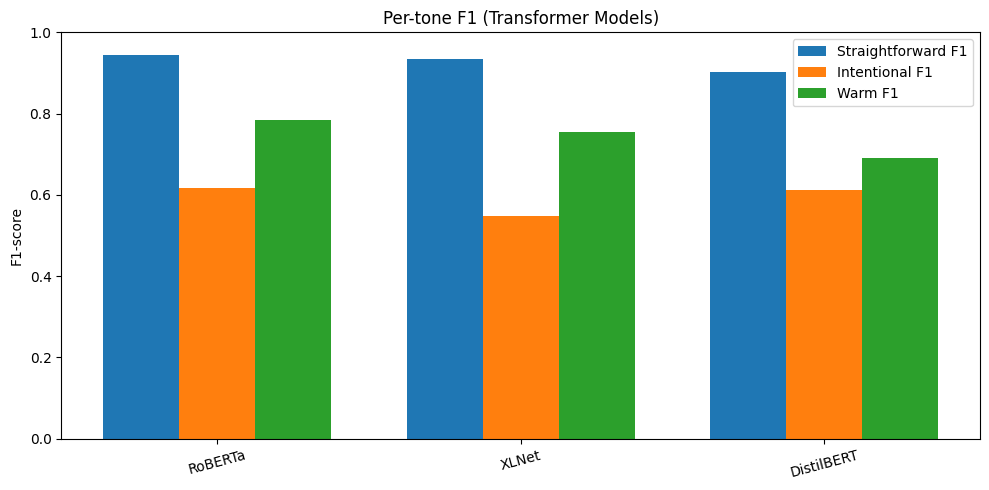

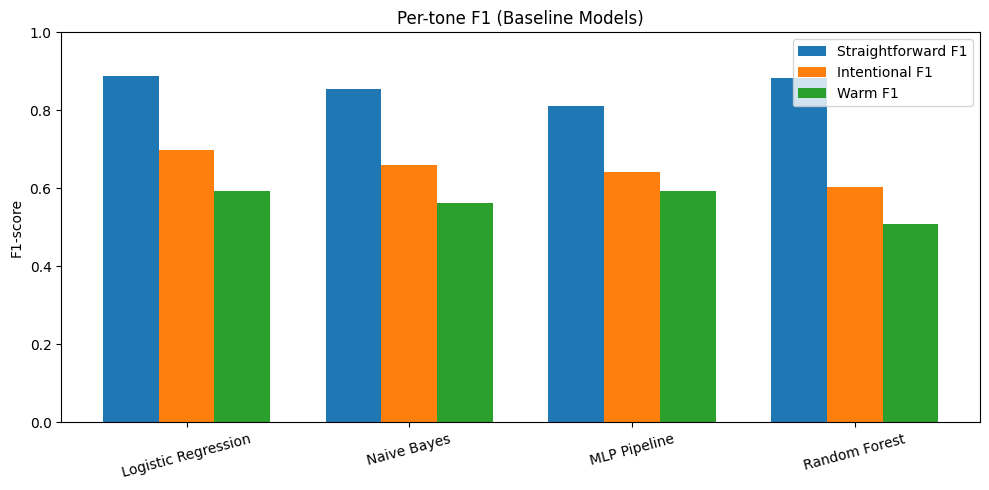

In [ ]:
tones = ["straightforward", "intentional", "warm"]

try:
    results_df = pd.DataFrame(results_data)
    macro_key = next(k for k in ["Macro F1", "macro_f1", "macro_f1_score"] if k in results_df.columns)
    model_order = results_df.sort_values(macro_key, ascending=False)["Model"].tolist()
except Exception:
    model_order = list(detailed_reports.keys())

transformer_models = ["RoBERTa", "DistilBERT", "XLNet"]
baseline_models = ["Logistic Regression", "MLP Pipeline", "Naive Bayes", "Random Forest"]

f1_by_tone = {tone: [] for tone in tones}
for m in model_order:
    rep = detailed_reports[m]
    for tone in tones:
        f1_by_tone[tone].append(rep[tone]["f1-score"])

def plot_models(models, title):
    x = np.arange(len(models))
    width = 0.25
    plt.figure(figsize=(10, 5))
    plt.bar(x - width, [detailed_reports[m]["straightforward"]["f1-score"] for m in models], width, label="Straightforward F1")
    plt.bar(x,         [detailed_reports[m]["intentional"]["f1-score"] for m in models],     width, label="Intentional F1")
    plt.bar(x + width, [detailed_reports[m]["warm"]["f1-score"] for m in models],            width, label="Warm F1")
    plt.xticks(x, models, rotation=15)
    plt.ylim(0, 1.0)
    plt.ylabel("F1-score")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot separately
plot_models([m for m in model_order if m in transformer_models], "Per-tone F1 (Transformer Models)")
plot_models([m for m in model_order if m in baseline_models], "Per-tone F1 (Baseline Models)")


Sentence Comparison

In [ ]:
sentences = test_set['Sentence'].to_numpy()

# --- normalise true labels & predictions to numpy int arrays (n_samples x 3) ---
label_names = ["straightforward", "intentional", "warm"]

y_true = y_test if isinstance(y_test, np.ndarray) else y_test[label_names].to_numpy()
y_true = np.asarray(y_true).astype(int)

rf_pred = np.asarray(rf_pred).astype(int)

assert y_true.shape == rf_pred.shape == (len(sentences), 3), (
    f"Shapes mismatch: sentences={len(sentences)}, y_true={y_true.shape}, rf_pred={rf_pred.shape}"
)

df = pd.DataFrame({"Sentence": sentences})
for i, lab in enumerate(label_names):
    df[f"true_{lab}"] = y_true[:, i]
    df[f"pred_{lab}"] = rf_pred[:, i]

def to_set(row, prefix):
    labs = [lab for lab in label_names if row[f"{prefix}{lab}"] == 1]
    return labs if labs else ["none"]

df["true_set"] = df.apply(lambda r: to_set(r, "true_"), axis=1)
df["pred_set"] = df.apply(lambda r: to_set(r, "pred_"), axis=1)

warm_fp = df[(df["true_warm"] == 0) & (df["pred_warm"] == 1)][["Sentence", "true_set", "pred_set"]]
warm_fn = df[(df["true_warm"] == 1) & (df["pred_warm"] == 0)][["Sentence", "true_set", "pred_set"]]

intentional_fn = df[(df["true_intentional"] == 1) & (df["pred_intentional"] == 0)][["Sentence", "true_set", "pred_set"]]

print("Warm false positives:", len(warm_fp))


display(warm_fp.head(10))

Warm false positives: 25


Sentence  \
2   you can simply skip the step or discard the va...   
9             tell us if you need any further support   
11                                  your time matters   
13         each lender chooses which one to work with   
14         the first step is finding the car you want   
19                     it is not a compulsory process   
20          create your perfect lease with confidence   
21  it simply tells you how much your car is worth...   
24                                  buy with a friend   
25                                 looking at leasing   

                          true_set                              pred_set  
2   [straightforward, intentional]               [straightforward, warm]  
9                [straightforward]               [straightforward, warm]  
11               [straightforward]                                [warm]  
13               [straightforward]               [straightforward, warm]  
14  [straightforward, intentional]  [straightforward, intentional, warm]  
19               [straightforward]               [straightforward, warm]  
20  [straightforward, intentional]  [straightforward, intentional, warm]  
21  [straightforward, intentional]  [straightforward, intentional, warm]  
24               [straightforward]                                [warm]  
25               [straightforward]  [straightforward, intentional, warm]

In [ ]:
print("Warm false negatives:", len(warm_fn))
display(warm_fn.head(10))

Warm false negatives: 6


Sentence  \
10  then simply look out for our phone call or ema...   
12  the good news is that you do not have to commi...   
17  of course you can we understand this can be a ...   
41  there are lots of nifty tools so that you can ...   
77                            we are sorry about this   
81  hello you recently reached out to us about\ndo...   

                                true_set                        pred_set  
10               [straightforward, warm]  [straightforward, intentional]  
12  [straightforward, intentional, warm]  [straightforward, intentional]  
17                   [intentional, warm]               [straightforward]  
41               [straightforward, warm]  [straightforward, intentional]  
77                                [warm]               [straightforward]  
81               [straightforward, warm]  [straightforward, intentional]

In [ ]:
print("Intentional false negatives:", len(intentional_fn))
display(intentional_fn.head(10))

Intentional false negatives: 17


Sentence  \
2   you can simply skip the step or discard the va...   
17  of course you can we understand this can be a ...   
18  if youre selling a truck plant or farm vehicle...   
26                                     let us do this   
27        be quick the link expires within 10 minutes   
30                          yes youre in full control   
34  if you would like to rebook your advert you ca...   
39                     start leasing with auto trader   
47                               can i change my mind   
48  our support team are here to help you get this...   

                                true_set                 pred_set  
2         [straightforward, intentional]  [straightforward, warm]  
17                   [intentional, warm]        [straightforward]  
18        [straightforward, intentional]        [straightforward]  
26        [straightforward, intentional]                   [warm]  
27                         [intentional]        [straightforward]  
30        [straightforward, intentional]                   [warm]  
34        [straightforward, intentional]        [straightforward]  
39        [straightforward, intentional]  [straightforward, warm]  
47                         [intentional]                   [warm]  
48  [straightforward, intentional, warm]  [straightforward, warm]

In [ ]:
df_xlnet = pd.DataFrame({
    "Sentence": test_texts_tbm,
    "true_straightforward": y_test_tbm[:, 0],
    "true_intentional": y_test_tbm[:, 1],
    "true_warm": y_test_tbm[:, 2],
    "pred_straightforward": preds_xlnet[:, 0],
    "pred_intentional": preds_xlnet[:, 1],
    "pred_warm": preds_xlnet[:, 2],
})

labels = ["straightforward", "intentional", "warm"]

def make_label_set(row, prefix):
    return [lab for i, lab in enumerate(labels) if row[f"{prefix}{lab}"] == 1] or ["none"]

df_xlnet["true_set"] = df_xlnet.apply(lambda r: make_label_set(r, "true_"), axis=1)
df_xlnet["pred_set"] = df_xlnet.apply(lambda r: make_label_set(r, "pred_"), axis=1)

# Filter misclassifications
df_misclassified_xlnet = df_xlnet[df_xlnet["true_set"] != df_xlnet["pred_set"]]

# Ensure pandas shows full sentences
pd.set_option("display.max_colwidth", None)

# Show first few misclassified examples
df_misclassified_xlnet[["Sentence", "true_set", "pred_set"]].head(10)


Sentence  \
0                                                                                   select the email me a link to sign in option   
1                                                                           you will still buy the car from the dealer or seller   
3   a lease credit application involves answering some important questions about your earnings and how much you spend each month   
4                                                                     we are always here to help never to push you into anything   
5                                                  click here to enrol into insight academy find out more about distance selling   
6                                                                                   heres a stepbystep guide on how it all works   
7                                                      think of us as a big friendly tech giant that is on your side all the way   
8                                                               we get how busy life can be so we are here to help you save time   
9                                                                                        tell us if you need any further support   
10            then simply look out for our phone call or email we will be in touch to secure your deal and get your order moving   

                                true_set                              pred_set  
0                      [straightforward]        [straightforward, intentional]  
1                      [straightforward]        [straightforward, intentional]  
3                      [straightforward]        [straightforward, intentional]  
4                                 [warm]               [straightforward, warm]  
5                      [straightforward]        [straightforward, intentional]  
6         [straightforward, intentional]                     [straightforward]  
7                                 [warm]               [straightforward, warm]  
8   [straightforward, intentional, warm]               [straightforward, warm]  
9                      [straightforward]               [straightforward, warm]  
10               [straightforward, warm]  [straightforward, intentional, warm]

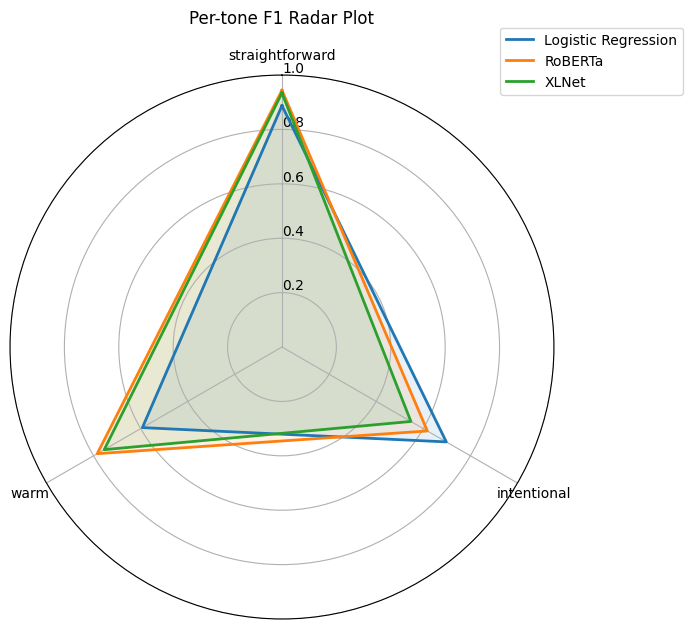

In [ ]:
tones = ["straightforward", "intentional", "warm"]

# Pick any subset of models present in detailed_reports
models_to_plot = ["Logistic Regression", "RoBERTa", "XLNet"]

def get_f1s(detailed_reports, model, tones):
    rep = detailed_reports[model]
    return [rep[t]["f1-score"] for t in tones]

# Build matrix of values from your detailed_reports
values = []
labels_present = []
for m in models_to_plot:
    if m in detailed_reports:
        values.append(get_f1s(detailed_reports, m, tones))
        labels_present.append(m)

values = np.array(values)

# Radar plot
num_vars = len(tones)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), tones)
ax.set_rlabel_position(0)
ax.set_ylim(0, 1.0)

for i, m in enumerate(labels_present):
    vals = values[i].tolist()
    vals += vals[:1]
    ax.plot(angles, vals, linewidth=2, label=m)
    ax.fill(angles, vals, alpha=0.1)

plt.title("Per-tone F1 Radar Plot", y=1.08)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.10))
plt.tight_layout()
plt.show()


## **Interpretability**

### LIME

#### Default LIME



In [ ]:
!pip install lime --quiet

In [ ]:
from lime.lime_text import LimeTextExplainer

class_names = ['straightforward', 'intentional', 'warm']
explainer = LimeTextExplainer(class_names=class_names)

n_to_explain = len(test_set)

lime_explanations = []

def roberta_predict_proba(texts):
    enc = tokenizer(list(texts), padding=True, truncation=True, return_tensors="pt", max_length=128)
    enc = {k: v.to(model_roberta.device) for k, v in enc.items()}
    with torch.no_grad():
        logits = model_roberta(**enc).logits
        probs = torch.sigmoid(logits).cpu().numpy()
    return probs


In [ ]:
test_texts = list(test_set['Sentence'])

n_to_explain = min(10, len(test_texts))
explanations = []

for i in range(n_to_explain):
    text = test_texts[i]
    exp = explainer.explain_instance(
        text_instance=text,
        classifier_fn=roberta_predict_proba,
        num_features=10,
        labels=list(range(len(class_names)))
    )
    lime_explanations.append({
        'text': text,
        'exp': exp
    })


In [ ]:
idx = 6
lime_explanations[idx]['exp'].show_in_notebook(text=lime_explanations[idx]['text'], labels=list(range(len(class_names))))

probs = roberta_predict_proba([text])[0]
binary_preds = (probs >= 0.5).astype(int)




#### Modified Lime Function: Making it easier to understand

##### The Function


> Here we modify how our lime reports appear


>LIME calling the model causes it to run out of GPU: The modified functions that use the CPU and reduce memory are contained here



In [ ]:
# Multi-panel LIME with word-wrapping and vertical separators
import re
from matplotlib.patches import Patch
from lime.lime_text import LimeTextExplainer

CLASS_NAMES_LOWER = ['straightforward', 'intentional', 'warm']
TITLE_MAP = {'straightforward':'Straightforward','intentional':'Intentional','warm':'Warm'}
TONE_ORDER = ['Straightforward','Intentional','Warm']
TONE_COLORS = {'Straightforward':'#1f77b4','Intentional':'#ff7f0e','Warm':'#2ca02c'}
GREY = '#cfcfcf'

# ---------- helpers ----------
def _normalize_feature_token(f: str) -> str:
    f = re.sub(r'^word=','',str(f)).split()[0]
    return f.strip("=<>:,.!?;\"'()[]{}").lower()

def _sentence_tokens(s: str):
    disp = s.split()
    low  = [w.lower().strip("=<>:,.!?;\"'()[]{}") for w in disp]
    return disp, low

def _tone_word_indices(sentence, tone_pairs):
    disp, low = _sentence_tokens(sentence)
    idxs = set()
    for feat, w in tone_pairs:
        if w <= 0:
            continue
        tok = _normalize_feature_token(feat)
        for i, lw in enumerate(low):
            if lw == tok:
                idxs.add(i)
    return idxs

def _measure_word_fracs(ax, words, fontsize=12):
    temps = [ax.text(0, 0.5, w, fontsize=fontsize, transform=ax.transAxes, alpha=0) for w in words]
    ax.figure.canvas.draw()
    ax_w_px = ax.get_window_extent().width
    widths  = [t.get_window_extent().width/ax_w_px for t in temps]
    for t in temps: t.remove()
    return widths

def _layout_wrapped_tokens(ax, words, fontsize=12, gap_frac=0.015, max_line_frac=0.86, line_gap=0.14):
    widths = _measure_word_fracs(ax, words, fontsize=fontsize)
    # Build lines
    lines, cur, cur_w = [], [], 0.0
    for i, (w, wf) in enumerate(zip(words, widths)):
        add = wf if not cur else (gap_frac + wf)
        if cur and (cur_w + add > max_line_frac):
            lines.append(cur)
            cur, cur_w = [], 0.0
        cur.append((i, w, wf))
        cur_w += add if cur_w > 0 else wf
    if cur: lines.append(cur)

    # Vertical centering of multiple lines around y_center
    y_center = 0.6
    total_h = line_gap * (len(lines)-1)
    y_top = y_center + total_h/2

    placements = []
    for li, line in enumerate(lines):
        widths_sum = sum(wf for _,_,wf in line) + gap_frac * max(0, len(line)-1)
        x = 0.5 - widths_sum/2
        y = y_top - li*line_gap
        for j, (idx, word, wf) in enumerate(line):
            placements.append((x, y, word, idx))
            x += wf + (gap_frac if j < len(line)-1 else 0.0)
    return placements

def _active_tones(probs_dict, predicted_dict=None, threshold=0.5):
    if predicted_dict is not None:
        active = [t for t in TONE_ORDER if predicted_dict.get(t, False)]
    else:
        active = [t for t in TONE_ORDER if float(probs_dict.get(t,0.0)) >= threshold]
    if not active:
        active = [max(TONE_ORDER, key=lambda t: float(probs_dict.get(t,0.0)))]
    return active

def render_lime_explanation_panels(
    sentence: str,
    probs_dict: dict,
    lime_dict: dict,
    predicted: dict = None,
    threshold: float = 0.5,
    show_only_predicted: bool = True,
    figsize=(12,6),
    wrap_fontsize=12,
    max_line_frac=0.86,
    line_gap=0.14,
    draw_separators=True
):
    active = _active_tones(probs_dict, predicted, threshold) if show_only_predicted else TONE_ORDER
    fig = plt.figure(figsize=figsize, constrained_layout=True)
    gs  = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[0.35, 1.65])

    # Header
    ax_head = fig.add_subplot(gs[0,0]); ax_head.axis("off")
    picked = [t for t in TONE_ORDER if (predicted.get(t,False) if predicted is not None else (probs_dict.get(t,0)>=threshold))]
    title = "PREDICTION: " + (("The sentence is " + " and ".join(picked)) if picked else "No tone above threshold")
    ax_head.text(0.5, 0.78, title, ha="center", va="center", fontsize=13, fontweight="bold", transform=ax_head.transAxes)
    legend_handles = [Patch(facecolor=TONE_COLORS[t], edgecolor="none", label=t) for t in TONE_ORDER]
    ax_head.legend(handles=legend_handles, loc="lower center", bbox_to_anchor=(0.5, 0.08), ncol=3, frameon=False)

    # Panels
    k = len(active)
    panels = gs[1,0].subgridspec(1, k, wspace=0.02)
    disp_tokens, _ = _sentence_tokens(sentence)

    overlay = fig.add_subplot(gs[1,0])
    overlay.axis("off")

    for col, tone in enumerate(active):
        cell = panels[0,col].subgridspec(2,1, height_ratios=[3,1], hspace=0.22)

        # Text panel with wrapping
        ax_txt = fig.add_subplot(cell[0,0]); ax_txt.axis("off")
        ax_txt.text(0.5, 0.95, tone, ha="center", va="center", fontsize=11, transform=ax_txt.transAxes)

        tone_idxs = _tone_word_indices(sentence, lime_dict.get(tone, []))
        placements = _layout_wrapped_tokens(ax_txt, disp_tokens,
                                            fontsize=wrap_fontsize,
                                            gap_frac=0.015,
                                            max_line_frac=max_line_frac,
                                            line_gap=line_gap)
        for x_left, y, word, idx in placements:
            if idx in tone_idxs:
                ax_txt.text(x_left, y, word, fontsize=wrap_fontsize, color="white",
                            bbox=dict(facecolor=TONE_COLORS[tone], alpha=0.9, boxstyle="round,pad=0.25"),
                            ha="left", va="center", transform=ax_txt.transAxes)
            else:
                ax_txt.text(x_left, y, word, fontsize=wrap_fontsize, color="black",
                            ha="left", va="center", transform=ax_txt.transAxes)

        ax_txt.text(0.5, 0.2, "Colored highlights show words supporting this tone.",
                    ha="center", va="center", fontsize=9, transform=ax_txt.transAxes)

        # Per-label 100% bar
        ax_bar = fig.add_subplot(cell[1,0])
        p = max(0.0, min(1.0, float(probs_dict.get(tone, 0.0))))
        ax_bar.barh([0], p,       color=TONE_COLORS[tone], height=0.6)
        ax_bar.barh([0], 1.0 - p, left=p, color=GREY, height=0.6)
        ax_bar.set_xlim(0,1); ax_bar.set_yticks([]); ax_bar.set_xticks([])
        label = f"{int(round(p*100))}%"
        if p >= 0.15:
            ax_bar.text(p/2, 0, label, ha="center", va="center", color="white", fontsize=11)
        else:
            ax_bar.text(p + 0.02, 0, label, ha="left", va="center", color="black", fontsize=11)

        # separator to the right of each column except the last
        if draw_separators and col < k-1:
            bb = ax_txt.get_position()
            x_sep = bb.x1
            overlay.plot([x_sep, x_sep], [bb.y0, bb.y1], color="#9e9e9e", linewidth=1.0, transform=fig.transFigure, clip_on=False)
            bb2 = ax_bar.get_position()
            overlay.plot([x_sep, x_sep], [bb2.y0, bb2.y1], color="#9e9e9e", linewidth=1.0, transform=fig.transFigure, clip_on=False)

    plt.show()



In [ ]:
def roberta_predict_proba(texts):
    if isinstance(texts, str):
        texts = [texts]

    device = _model_device(model_roberta)
    model_roberta.eval()

    enc = tokenizer(
        list(texts),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt",
    )
    enc = {k: v.to(device) for k, v in enc.items()}

    with torch.no_grad():
        logits = model_roberta(**enc).logits
        probs = torch.sigmoid(logits).detach().cpu().numpy()

    return probs

In [ ]:
# Batched classifier for LIME that falls back to CPU if OOM
import torch, gc, numpy as np
from lime.lime_text import LimeTextExplainer

def make_lime_classifier_fn(model, tokenizer, max_length=128, batch_size=16, prefer_gpu=True):

    device = torch.device("cuda") if (prefer_gpu and torch.cuda.is_available()) else torch.device("cpu")
    model.eval()

    def classifier_fn(texts):
        try:
            return _batched_probs(texts, model, tokenizer, max_length, batch_size, device)
        except RuntimeError as e:
            if "CUDA out of memory" in str(e):
                # graceful fallback to CPU
                print("[LIME] CUDA OOM → falling back to CPU for this explanation.")
                gc.collect()
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()
                return _batched_probs(texts, model, tokenizer, max_length, batch_size, torch.device("cpu"))
            raise
    return classifier_fn

@torch.no_grad()
def _batched_probs(texts, model, tokenizer, max_length, batch_size, device):
    model.to(device)
    out = []
    for i in range(0, len(texts), batch_size):
        batch = list(texts[i:i+batch_size])
        enc = tokenizer(batch, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
        enc = {k: v.to(device) for k, v in enc.items()}
        logits = model(**enc).logits
        probs  = torch.sigmoid(logits).detach().cpu().numpy()
        out.append(probs)
    return np.vstack(out)


In [ ]:
#Function to explain tone single text of using our Modifed LIME

def tov_explain_text(text, classifier_fn, threshold=0.5, num_features=10, num_samples=1000,
                     explainer=None, show_only_predicted=True, return_payload=False, **render_kwargs):
    import numpy as np
    from lime.lime_text import LimeTextExplainer

    probs_vec = np.asarray(classifier_fn([text])[0], dtype=float).ravel()
    assert probs_vec.size == len(CLASS_NAMES_LOWER), "Classifier must return 3 probabilities."
    probs_dict = {TITLE_MAP[c]: float(p) for c, p in zip(CLASS_NAMES_LOWER, probs_vec)}

    if explainer is None:
        explainer = LimeTextExplainer(class_names=CLASS_NAMES_LOWER)
    exp = explainer.explain_instance(
        text_instance=text,
        classifier_fn=classifier_fn,
        num_features=num_features,
        num_samples=num_samples,
        labels=list(range(len(CLASS_NAMES_LOWER)))
    )
    lime_dict = {TITLE_MAP[c]: exp.as_list(label=i) for i, c in enumerate(CLASS_NAMES_LOWER)}
    predicted = {TITLE_MAP[c]: (p >= threshold) for c, p in zip(CLASS_NAMES_LOWER, probs_vec)}

    render_lime_explanation_panels(
        sentence=text,
        probs_dict=probs_dict,
        lime_dict=lime_dict,
        predicted=predicted,
        threshold=threshold,
        show_only_predicted=show_only_predicted,
        **render_kwargs
    )
    if return_payload:
        return {"text": text, "probs": probs_dict, "predicted": predicted, "lime": lime_dict}


In [ ]:
def explain_from_dataset(df, classifier_fn, idx=None, text_col='Sentence',
                         threshold=0.5, num_features=10, num_samples=1000,
                         explainer=None, seed=None, show_only_predicted=True, return_payload=False, **render_kwargs):
    import numpy as np
    from lime.lime_text import LimeTextExplainer

    n = len(df)
    if idx is None:
        rng = np.random.default_rng(seed)
        idx = int(rng.integers(0, n))
    text = str(df.iloc[idx][text_col])

    probs_vec = np.asarray(classifier_fn([text])[0], dtype=float).ravel()
    probs_dict = {TITLE_MAP[c]: float(p) for c, p in zip(CLASS_NAMES_LOWER, probs_vec)}

    if explainer is None:
        explainer = LimeTextExplainer(class_names=CLASS_NAMES_LOWER)
    exp = explainer.explain_instance(
        text_instance=text,
        classifier_fn=classifier_fn,
        num_features=num_features,
        num_samples=num_samples,
        labels=list(range(len(CLASS_NAMES_LOWER)))
    )
    lime_dict = {TITLE_MAP[c]: exp.as_list(label=i) for i, c in enumerate(CLASS_NAMES_LOWER)}
    predicted = {TITLE_MAP[c]: (p >= threshold) for c, p in zip(CLASS_NAMES_LOWER, probs_vec)}

    render_lime_explanation_panels(
        sentence=text,
        probs_dict=probs_dict,
        lime_dict=lime_dict,
        predicted=predicted,
        threshold=threshold,
        show_only_predicted=show_only_predicted,
        **render_kwargs
    )
    if return_payload:
        return {"idx": idx, "text": text, "probs": probs_dict, "predicted": predicted, "lime": lime_dict}


In [ ]:
from IPython.display import display, HTML

def tov_explain_texts(
    texts,
    classifier_fn,
    threshold=0.5,
    num_features=10,
    num_samples=1000,
    show_only_predicted=True,
    explainer=None,
    return_payload=False,
    clear_cuda_cache=True,
    spacer_px=24,
    separator="space",
    **render_kwargs
):
    import numpy as np
    from lime.lime_text import LimeTextExplainer
    import gc, torch

    if isinstance(texts, str):
        texts = [texts]
    if explainer is None:
        explainer = LimeTextExplainer(class_names=CLASS_NAMES_LOWER)

    payloads = []
    for i, text in enumerate(texts):
        probs_vec = np.asarray(classifier_fn([text])[0], dtype=float).ravel()
        assert probs_vec.size == len(CLASS_NAMES_LOWER), "Classifier must return 3 probabilities."
        probs_dict = {TITLE_MAP[c]: float(p) for c, p in zip(CLASS_NAMES_LOWER, probs_vec)}

        exp = explainer.explain_instance(
            text_instance=text,
            classifier_fn=classifier_fn,
            num_features=num_features,
            num_samples=num_samples,
            labels=list(range(len(CLASS_NAMES_LOWER)))
        )
        lime_dict = {TITLE_MAP[c]: exp.as_list(label=j) for j, c in enumerate(CLASS_NAMES_LOWER)}
        predicted = {TITLE_MAP[c]: (p >= threshold) for c, p in zip(CLASS_NAMES_LOWER, probs_vec)}

        render_lime_explanation_panels(
            sentence=text,
            probs_dict=probs_dict,
            lime_dict=lime_dict,
            predicted=predicted,
            threshold=threshold,
            show_only_predicted=show_only_predicted,
            **render_kwargs
        )

        if return_payload:
            payloads.append({"text": text, "probs": probs_dict, "predicted": predicted, "lime": lime_dict})

        # Spacer between renders (except after the last one)
        if i < len(texts) - 1:
            if separator == "rule":
                display(HTML(f"<hr style='border:none;border-top:1px solid #ddd; margin:{spacer_px//2}px 0;'>"))
            else:  # space
                display(HTML(f"<div style='height:{spacer_px}px'></div>"))

        if clear_cuda_cache:
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

    if return_payload:
        return payloads


##### Interpreting From Existing Data

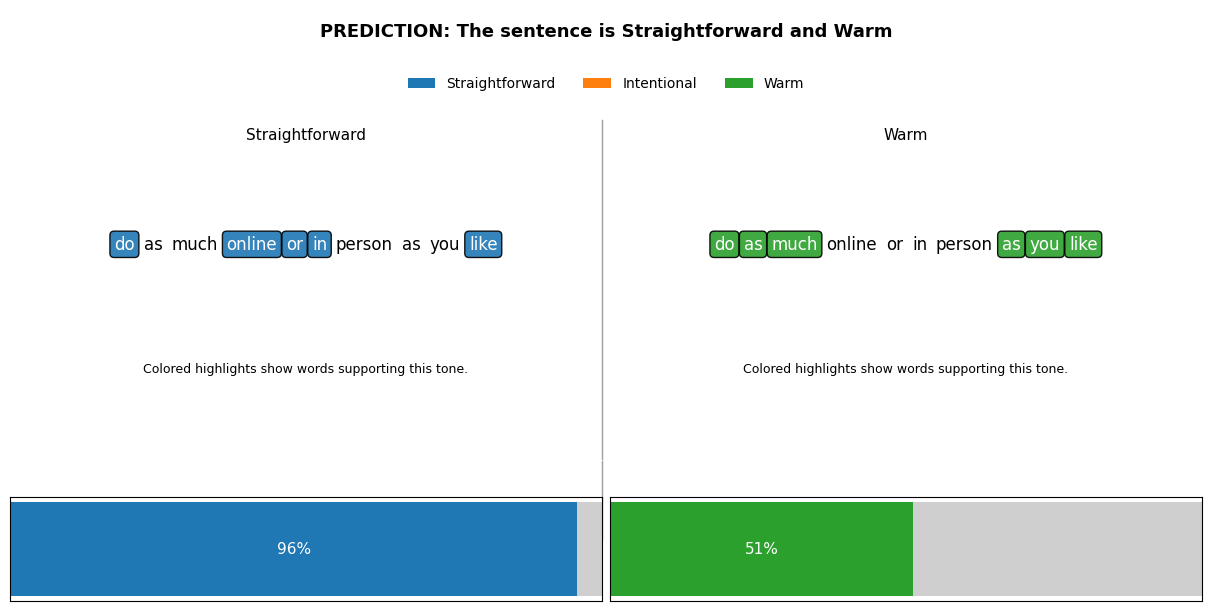

In [ ]:
_ = explain_from_dataset(test_set, classifier_fn=roberta_predict_proba, seed=31)


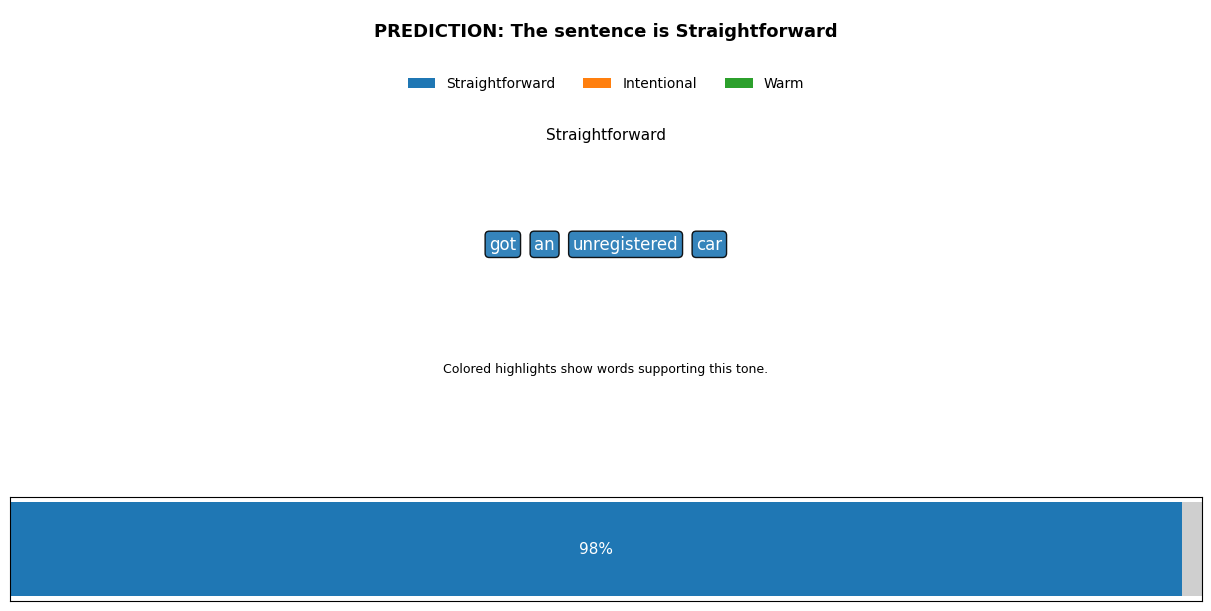

In [ ]:
_ = explain_from_dataset(test_set, classifier_fn=roberta_predict_proba, idx=86)

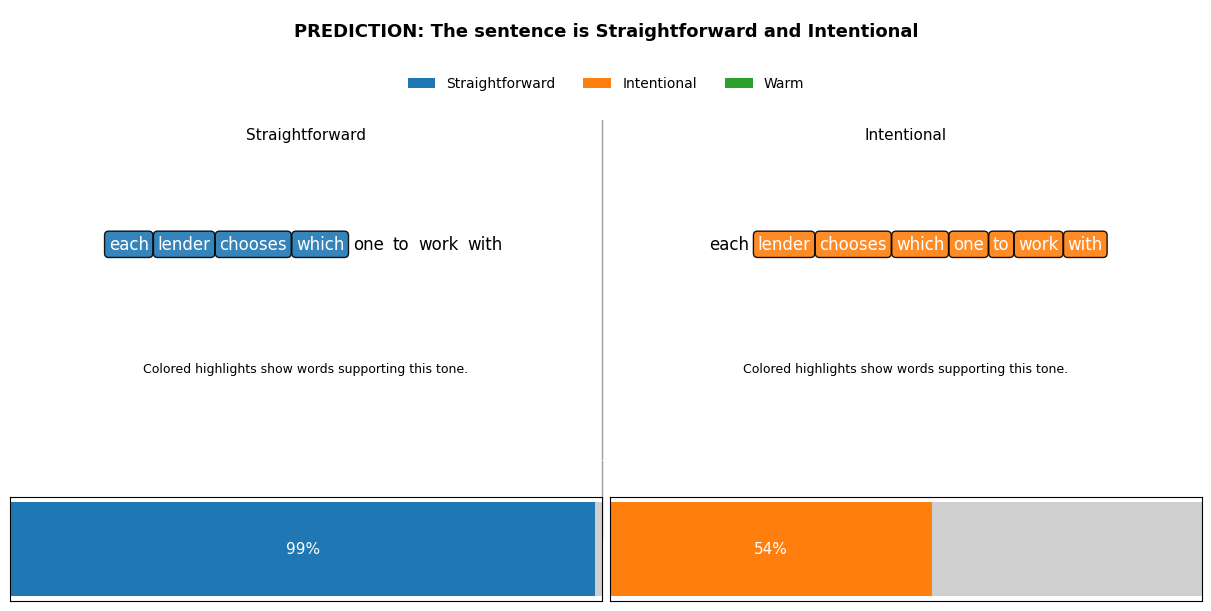

In [ ]:
_ = explain_from_dataset(test_set, classifier_fn=roberta_predict_proba, idx=13)

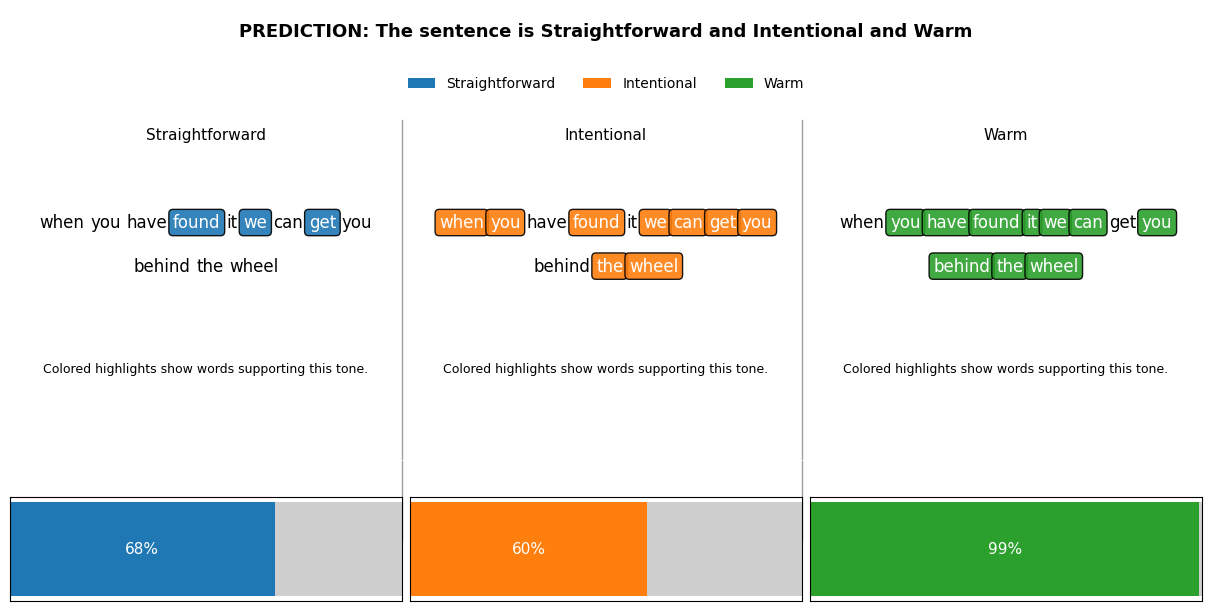

In [ ]:
_ = explain_from_dataset(test_set, classifier_fn=roberta_predict_proba, idx=55)

##### Interpreting for supplied text

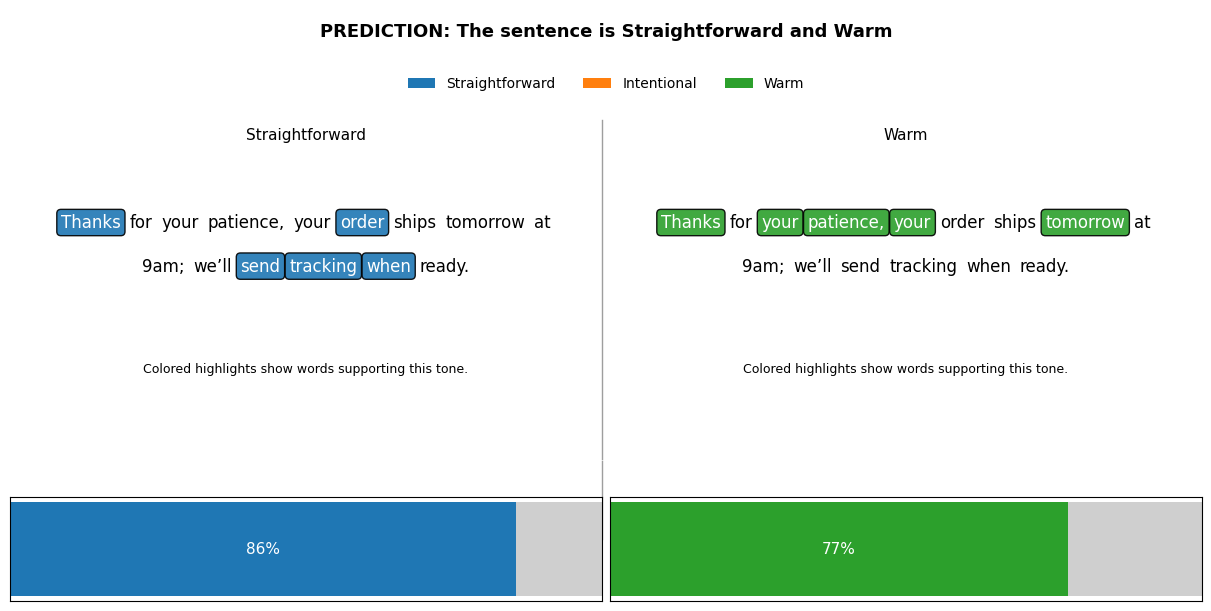

In [ ]:
# safe classifier_fn for LIME
lime_clf = make_lime_classifier_fn(
    model=model_roberta,
    tokenizer=tokenizer,
    max_length=128,
    batch_size=16,
    prefer_gpu=True
)

import gc, torch
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

tov_explain_text(
    "Thanks for your patience, your order ships tomorrow at 9am; we’ll send tracking when ready.",
    classifier_fn=lime_clf,
    num_samples=1000,
    wrap_fontsize=12,
    max_line_frac=0.86
)

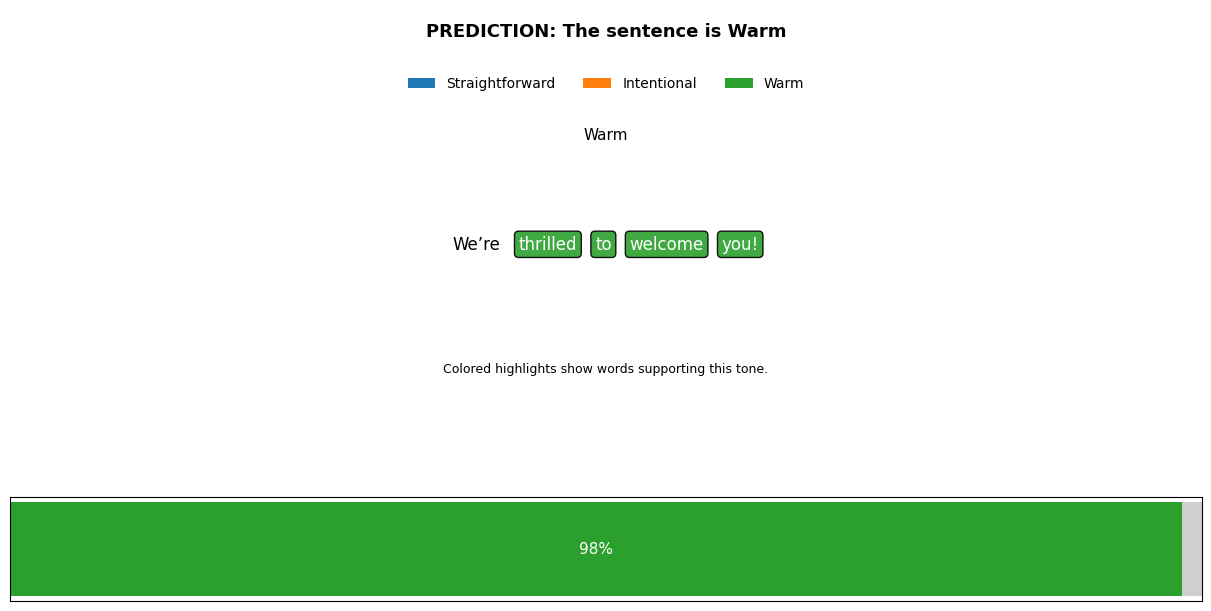

In [ ]:
tov_explain_text(
    "We’re thrilled to welcome you!",
    classifier_fn=roberta_predict_proba,
    threshold=0.5
)

Testing with harder cases

In [ ]:
TOV_HARD_CASES = [
    "Please upload your driver’s license by 5pm so we can complete your application. /n",
    "We’re excited to welcome you aboard and can’t wait to get started together.",
    "Your payment was received at 14:03; your receipt is attached below.",

    "Thanks for your patience—your order ships tomorrow at 9am; we’ll send tracking when ready.",
    "We appreciate your effort; to avoid delays, submit the form by Friday noon.",

    "I appreciate the draft, but this version doesn’t meet the requirements yet.",
    "Thank you for reaching out; unfortunately, we can’t approve the request at this time.",

    "Please confirm your preferred time so we can schedule installation this week.",
    "Kindly attach the receipt; we’ll expedite your refund once it’s received.",

    "Just checking in on the document.",

    "We’re happy you chose us for your course; to secure your place and avoid delays, \
please complete the registration form, upload your identity document, and select a start date \
before Friday at 5pm, and we’ll confirm your timetable by email.",
]


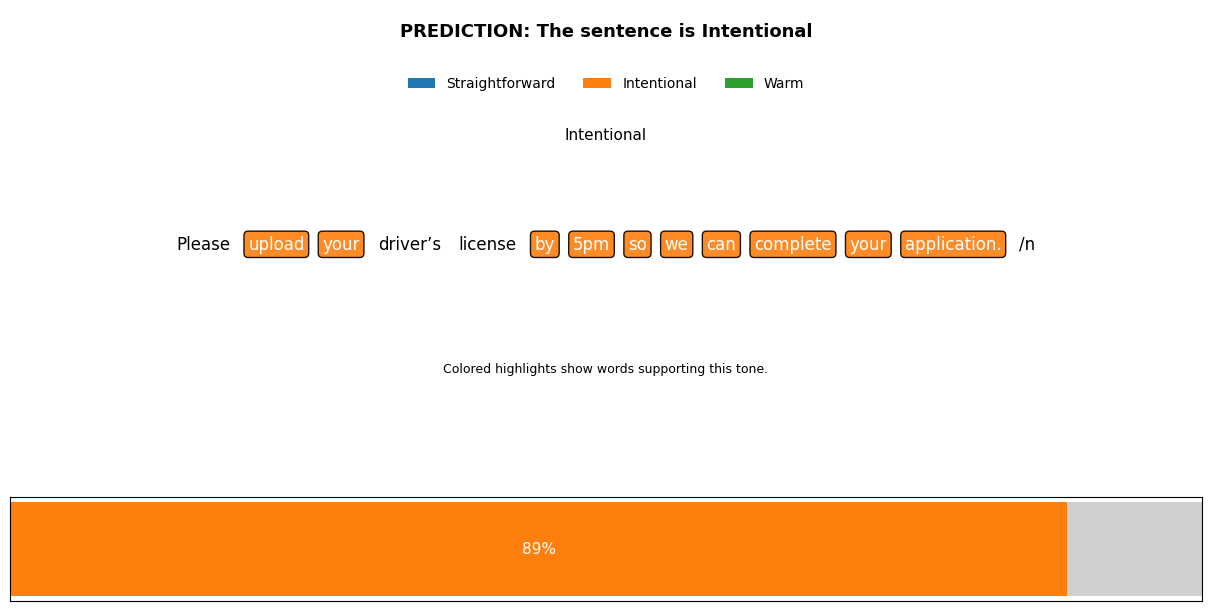

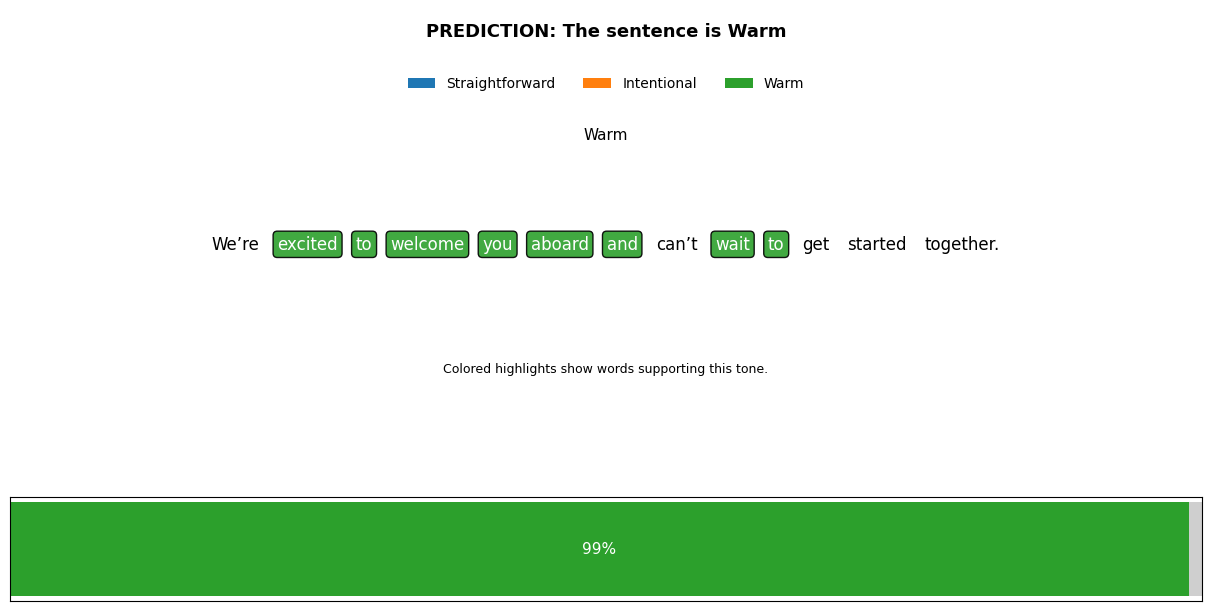

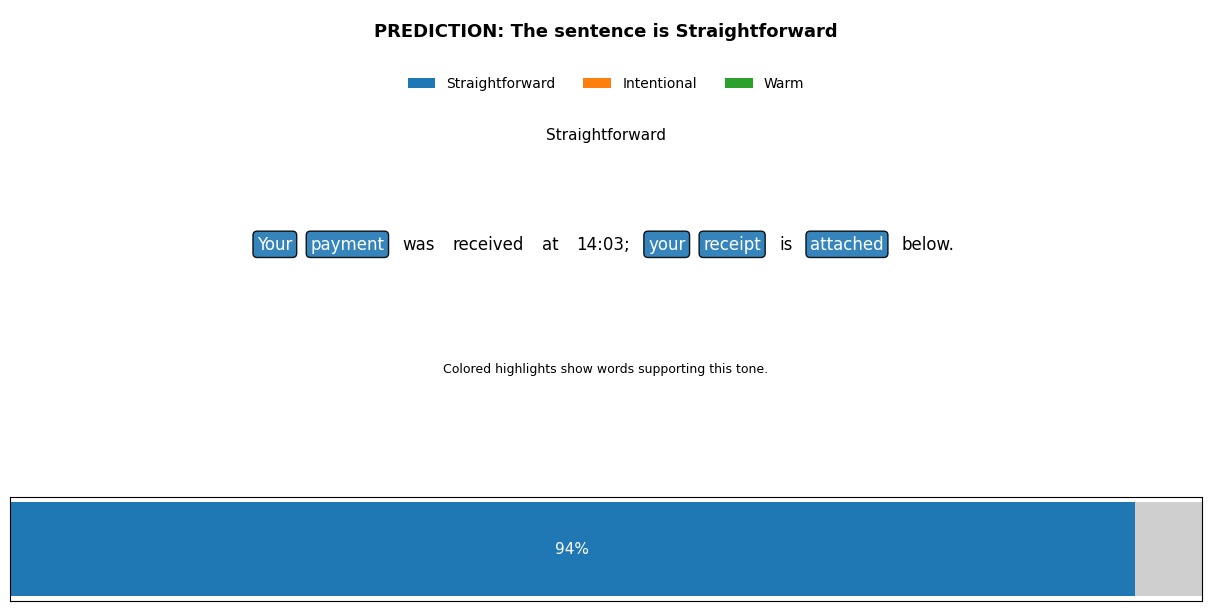

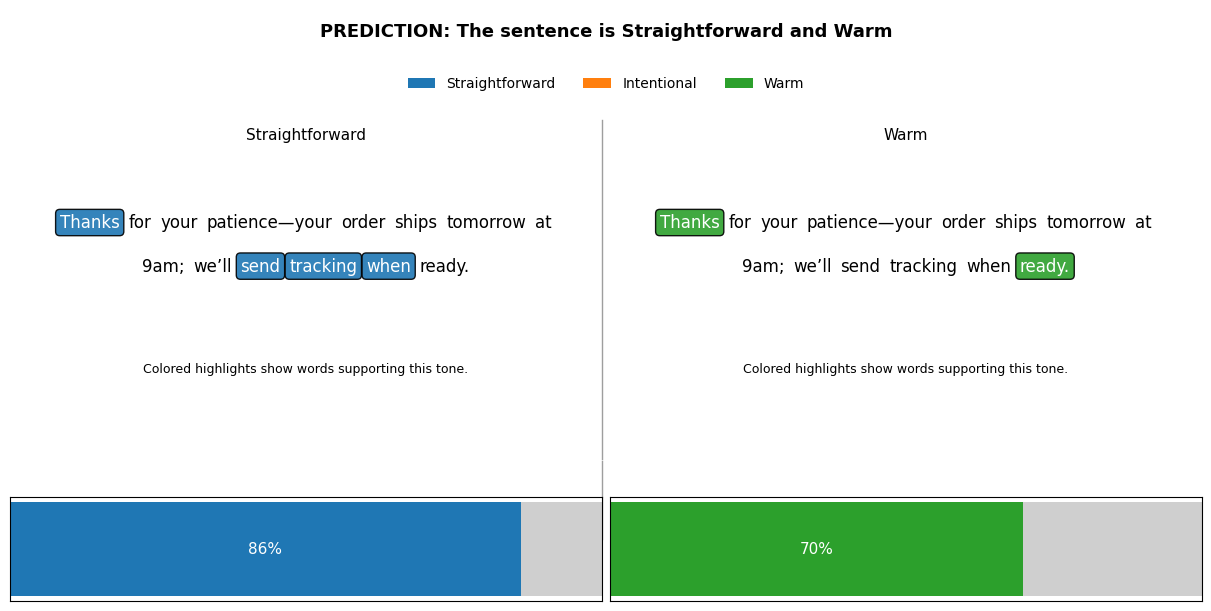

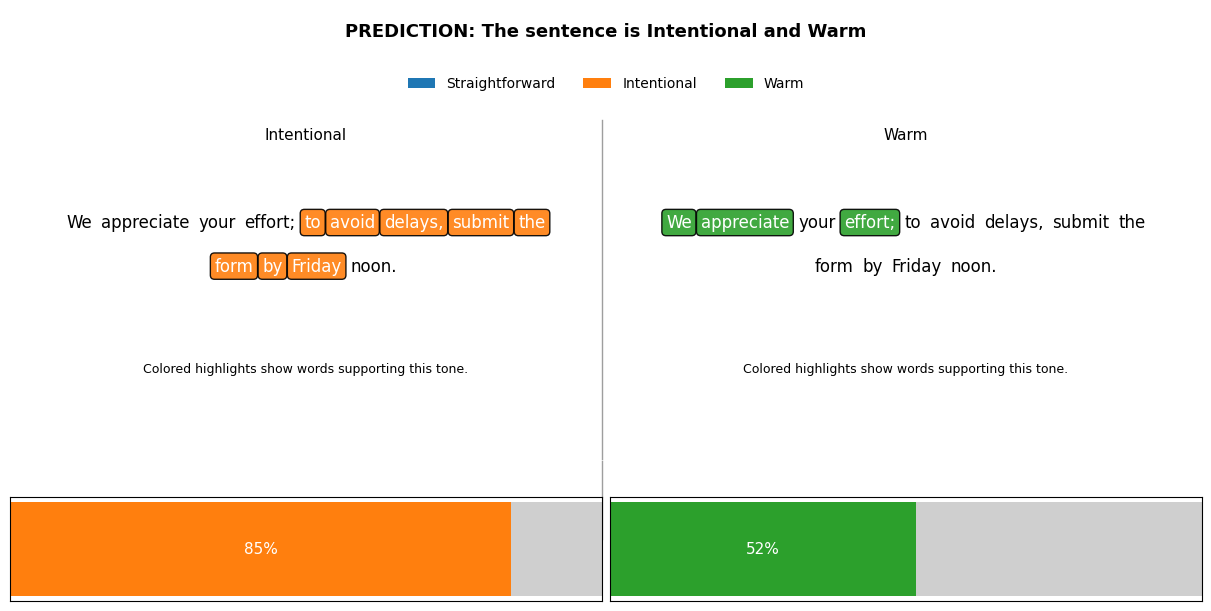

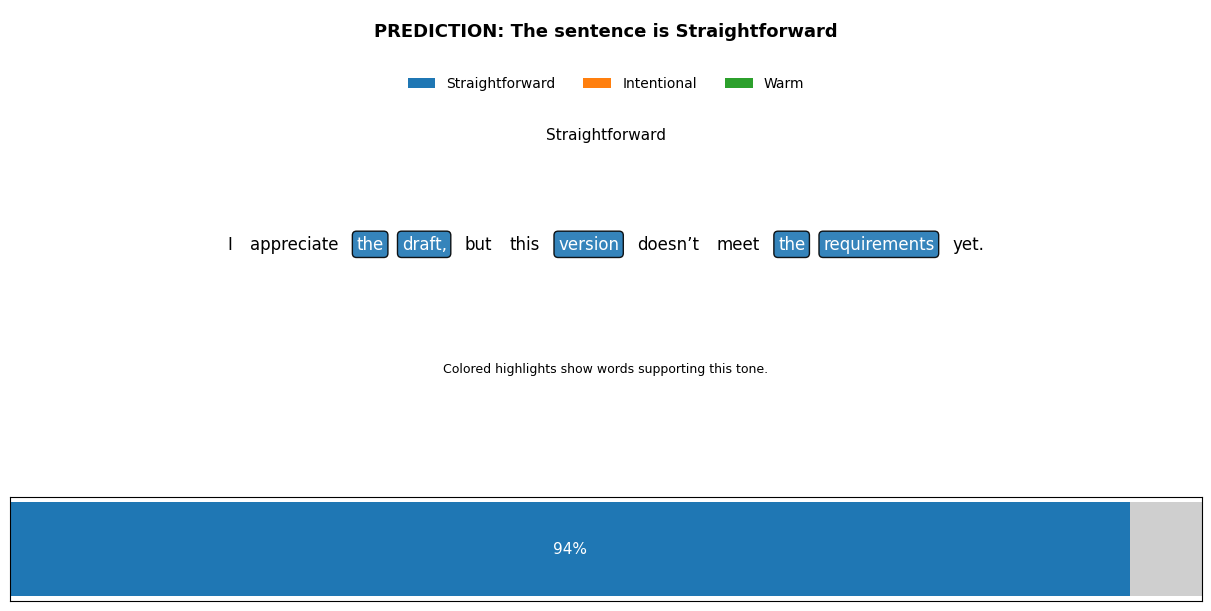

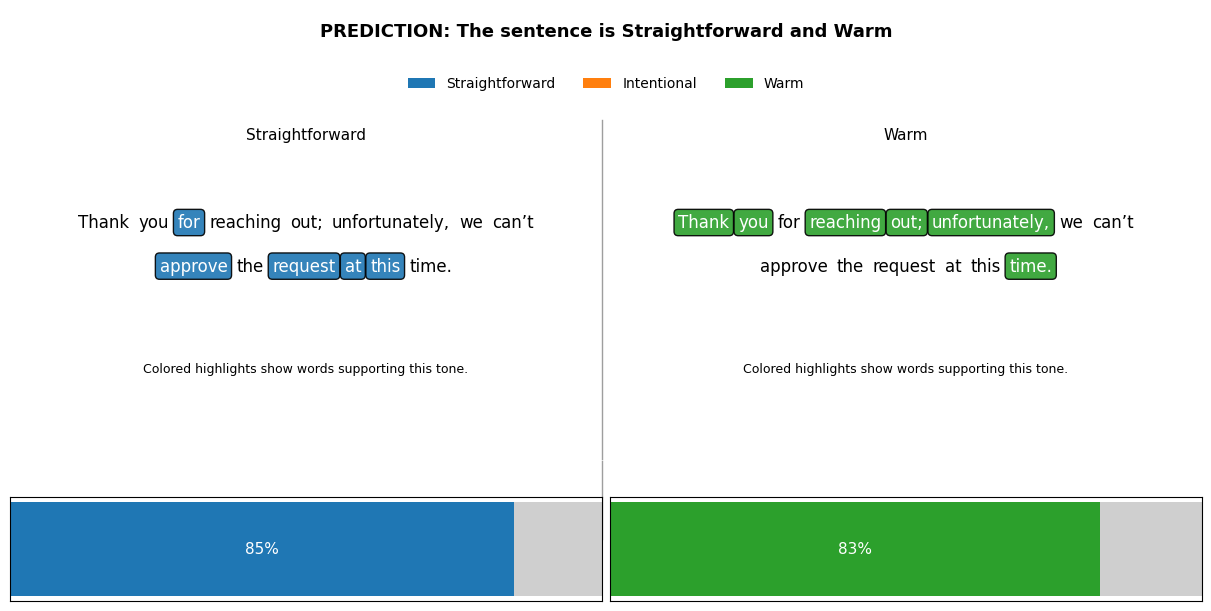

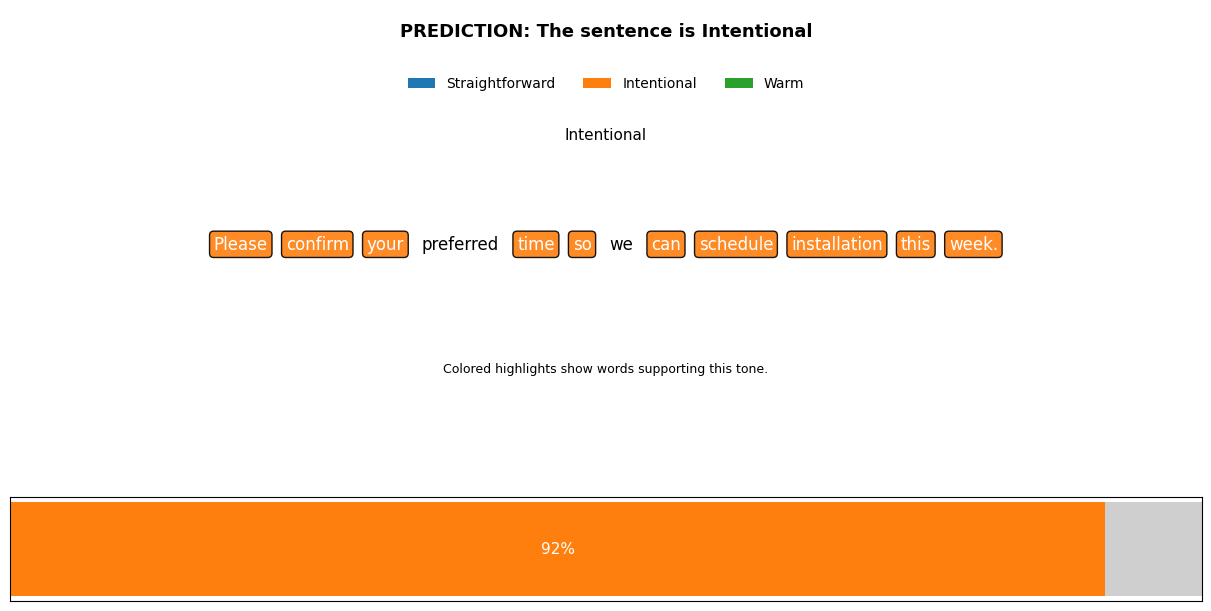

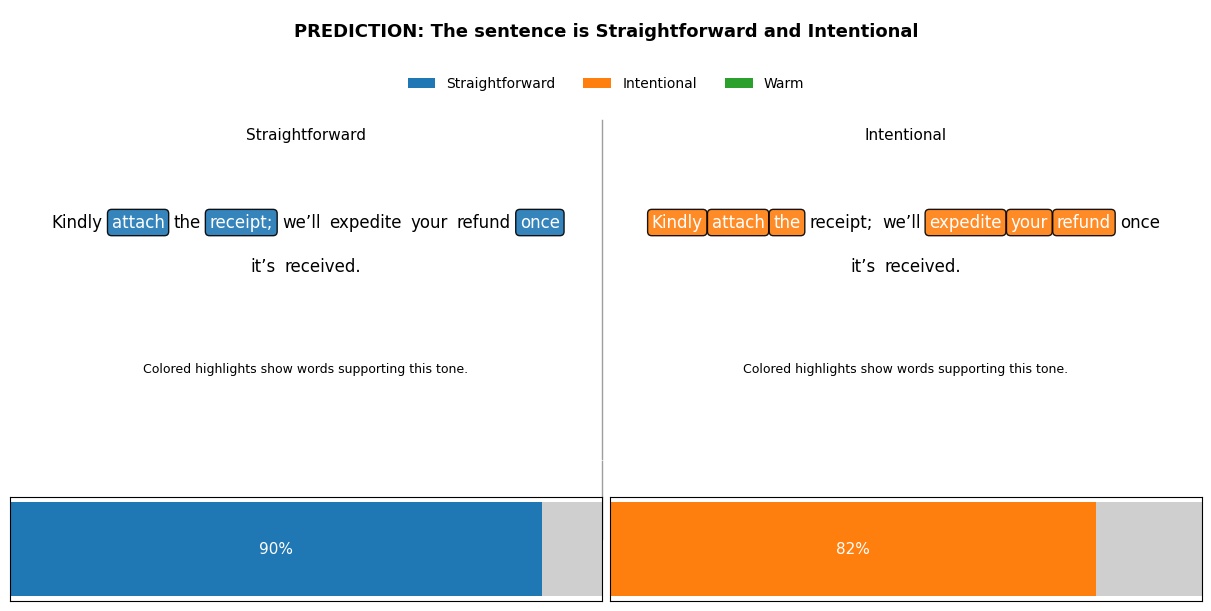

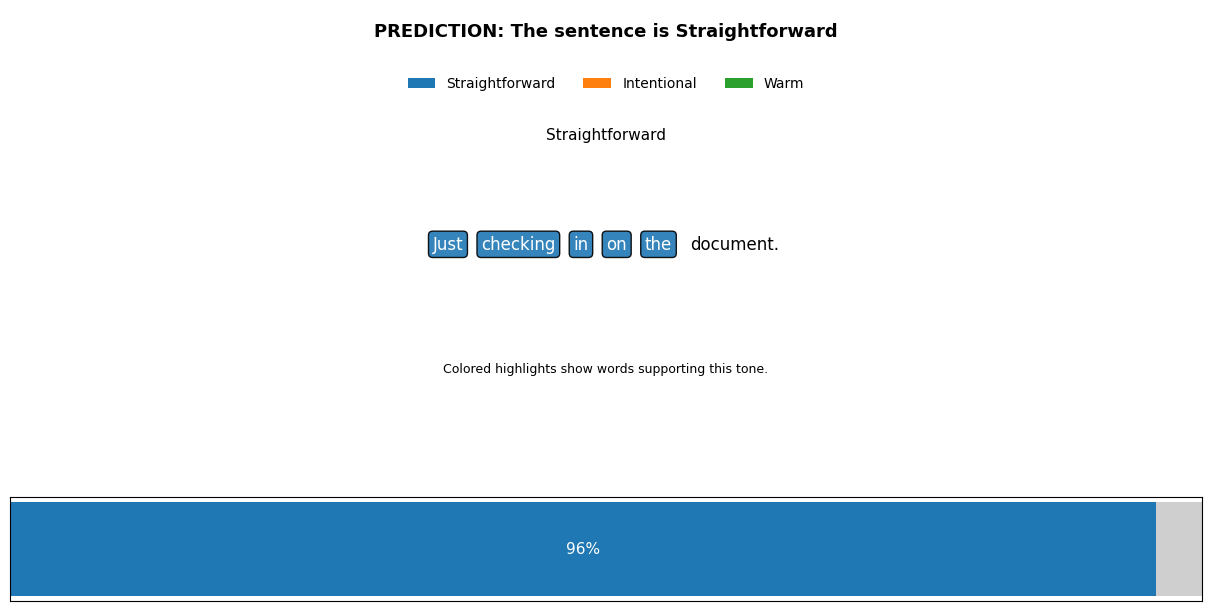

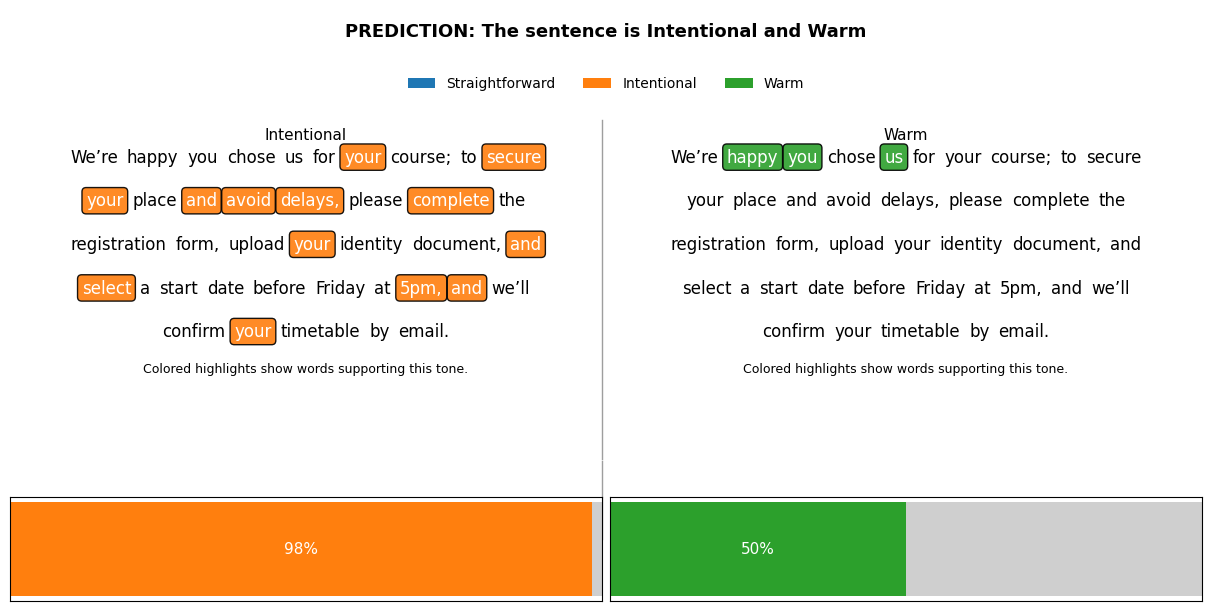

In [ ]:
_ = tov_explain_texts(
    TOV_HARD_CASES,
    classifier_fn=lime_clf,
    num_samples=1000,
    wrap_fontsize=12,
    max_line_frac=0.86
)